In [2]:
import pandas as pd


# Load the data
voting_df = pd.read_csv('data/voting-by-county.csv')

# Filter for the year 2020
voting_df = voting_df.query('year == 2020')

# Filter for the two main parties
voting_df = voting_df[voting_df['party'].isin(['DEMOCRAT', 'REPUBLICAN'])]

# Create the new column
voting_df['percent_votes'] = voting_df['candidatevotes'] / voting_df['totalvotes']

# Drop unnecessary columns
voting_df = voting_df.drop(columns=['candidatevotes', 'totalvotes', 'office', 'candidate', 'version', 'mode', 'state', 'state_po', 'year', 'county_name'])

# Group by county_fips and party, and aggregate percent_votes
voting_df = voting_df.groupby(['county_fips', 'party']).agg({'percent_votes': 'mean'}).reset_index()

# Pivot the DataFrame
pivot_df = voting_df.pivot(index='county_fips', columns='party', values='percent_votes')

# Rename the columns
pivot_df = pivot_df.rename(columns={'DEMOCRAT': 'percent_democrat', 'REPUBLICAN': 'percent_republican'})

# Reset the index to make county_fips a column again
pivot_df = pivot_df.reset_index()

# Convert county_fips to integer and rename to FIPS
pivot_df['county_fips'] = pivot_df['county_fips'].astype(int)
pivot_df = pivot_df.rename(columns={'county_fips': 'FIPS'})

# Display the first 10 rows to verify
voting_df = pivot_df[['FIPS', 'percent_democrat', 'percent_republican']]

voting_df.head(10)

party  FIPS  percent_democrat  percent_republican
0      1001          0.270184            0.714368
1      1003          0.224090            0.761714
2      1005          0.457882            0.534512
3      1007          0.206983            0.784263
4      1009          0.095694            0.895716
5      1011          0.747019            0.248428
6      1013          0.417896            0.575253
7      1015          0.298452            0.688484
8      1017          0.416449            0.572690
9      1019          0.132022            0.860337

In [4]:
vaccine_df = pd.read_csv('data/CDC_covid_data.csv')

vaccine_df = vaccine_df[['FIPS', 'Administered_Dose1_Recip_18PlusPop_Pct']]

vaccine_df = vaccine_df.dropna()


# Sort vaccine_df based on FIPS
vaccine_df = vaccine_df[vaccine_df['FIPS'].apply(lambda x: str(x).isdigit())]
vaccine_df['FIPS'] = vaccine_df['FIPS'].astype(int)
#vaccine_df = vaccine_df.sort_values(by='FIPS')

vaccine_df.head(10)

/tmp/ipykernel_3119/1351102543.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  vaccine_df = pd.read_csv('data/CDC_covid_data.csv')


FIPS  Administered_Dose1_Recip_18PlusPop_Pct
0   55129                                    81.3
1   19173                                    63.3
2   36059                                    95.0
3   48281                                    64.6
5   13101                                    49.2
6   12013                                    50.9
7   17027                                    76.8
9   48421                                    58.4
11  47081                                    57.9
12  50027                                    73.8

In [14]:
# Vaccination hesitancy

hesitancy = pd.read_csv("./data/vaccination.csv")
hesitancy = hesitancy[[
    'Estimated hesitant',
    'Estimated hesitant or unsure', 
    'Estimated strongly hesitant',
    'Social Vulnerability Index (SVI)',
    'CVAC level of concern for vaccination rollout',
    'FIPS Code'
]]
hesitancy.head(10)


Estimated hesitant  Estimated hesitant or unsure  \
0              0.1806                        0.2400   
1              0.1783                        0.2350   
2              0.1735                        0.2357   
3              0.1735                        0.2357   
4              0.1808                        0.2526   
5              0.1805                        0.2313   
6              0.1855                        0.2404   
7              0.2361                        0.2884   
8              0.1422                        0.1809   
9              0.2361                        0.2884   

   Estimated strongly hesitant  Social Vulnerability Index (SVI)  \
0                       0.1383                              0.89   
1                       0.1368                              0.87   
2                       0.1337                              0.93   
3                       0.1337                              0.73   
4                       0.1390                              0.96   
5                       0.1379                              0.70   
6                       0.1431                              0.75   
7                       0.1704                              0.58   
8                       0.1056                              0.12   
9                       0.1704                              0.49   

   CVAC level of concern for vaccination rollout  FIPS Code  
0                                           0.64       1123  
1                                           0.84       1121  
2                                           0.94       1131  
3                                           0.82       1129  
4                                           0.96       1119  
5                                           0.80       1133  
6                                           0.68       1127  
7                                           0.87       2013  
8                                           0.25       1117  
9                                           0.77       2016

In [5]:
# literacy dataset

''' 
data from : https://nces.ed.gov/surveys/piaac/skillsmap/
'''

literacy_df = pd.read_csv('data/literacy_rates.csv')
literacy_df = literacy_df[literacy_df['grpName'] == 'all']
literacy_df = literacy_df[['FIPS_code', 'Lit_A']]
literacy_df = literacy_df.rename(columns={'FIPS_code': 'FIPS', 'Lit_A': 'avg_literacy_score'})


In [16]:
# life expectancy dataset

''' 
Downloaded from : https://ghdx.healthdata.org/record/ihme-data/united-states-life-expectancy-by-county-race-ethnicity-2000-2019
Based on this paper: https://www.sciencedirect.com/science/article/pii/S0140673622008765?via%3Dihub#cesec90 
'''

# read in 
life_expectancy_df = pd.read_csv('data/life_expectancy_2019_both.csv')

# all races
life_expectancy_df = life_expectancy_df[life_expectancy_df['race_id'] == 1]

# slim down 
life_expectancy_df = life_expectancy_df[['fips', 'val']]

# fips int conversion 
life_expectancy_df = life_expectancy_df.dropna(subset=['fips', 'val'])
life_expectancy_df = life_expectancy_df[pd.to_numeric(life_expectancy_df['fips'], errors='coerce').notnull()]
life_expectancy_df['fips'] = life_expectancy_df['fips'].astype(int)

# rename columns
life_expectancy_df = life_expectancy_df.rename(columns={'fips': 'FIPS', 'val': 'life_expectancy'})

# In case of multiple FIPS present, pick the one with the higher life_expectancy
life_expectancy_df = life_expectancy_df.loc[life_expectancy_df.groupby('FIPS')['life_expectancy'].idxmax()]

# Display the resulting DataFrame
life_expectancy_df['life_expectancy'].value_counts()

life_expectancy
80.268922    7
80.545202    6
82.480432    5
78.488879    3
82.069828    3
            ..
72.207049    1
78.642509    1
73.703272    1
70.990247    1
75.565800    1
Name: count, Length: 3129, dtype: int64

In [17]:
# national census dataset 

'''
downloaded from: https://www.census.gov/data/tables/time-series/demo/popest/2020s-counties-detail.html
'''

census_df = pd.read_csv('data/census_data.csv', encoding='latin1')

# get fips
census_df['COUNTY'] = census_df['COUNTY'].astype(str).str.zfill(3)
census_df['FIPS'] = (census_df['STATE'].astype(str) + census_df['COUNTY'].astype(str)).astype(int)

# Filter to keep only rows where AGEGRP is 0
census_df = census_df[census_df['AGEGRP'] == 0]
census_df = census_df[census_df['YEAR'] == 5]

# Drop columns
census_df = census_df.drop(columns=['AGEGRP', 'SUMLEV', 'STATE', 'COUNTY', 'CTYNAME', 'STNAME', 'YEAR'])

# Identify columns to be divided by TOT_POP
columns_to_divide = census_df.columns.difference(['TOT_POP', 'FIPS'])

# Divide each of these columns by TOT_POP to get the proportion
census_df[columns_to_divide] = census_df[columns_to_divide].div(census_df['TOT_POP'], axis=0)

census_df = census_df.rename(columns={'TOT_MALE': 'PROP_MALE', 'TOT_FEMALE': 'PROP_FEMALE'})

# display
print(census_df.shape)
census_df.head()


(3144, 74)


TOT_POP  PROP_MALE  PROP_FEMALE   WA_MALE  WA_FEMALE   BA_MALE  \
76     60342   0.485184     0.514816  0.365218   0.379387  0.100345   
171   253507   0.487154     0.512846  0.426296   0.447435  0.041257   
266    24585   0.531462     0.468538  0.263901   0.232377  0.250193   
361    21868   0.527254     0.472746  0.389290   0.377492  0.124611   
456    59816   0.497459     0.502541  0.473017   0.479537  0.010984   

     BA_FEMALE   IA_MALE  IA_FEMALE   AA_MALE  ...  HWAC_FEMALE  HBAC_MALE  \
76    0.113718  0.002453   0.002502  0.005668  ...     0.016141   0.002602   
171   0.043123  0.004319   0.004170  0.004769  ...     0.025798   0.001396   
266   0.220948  0.005044   0.003254  0.002400  ...     0.022209   0.003864   
361   0.081535  0.003018   0.002927  0.001189  ...     0.014542   0.001738   
456   0.009395  0.003344   0.003076  0.002424  ...     0.046593   0.001605   

     HBAC_FEMALE  HIAC_MALE  HIAC_FEMALE  HAAC_MALE  HAAC_FEMALE  HNAC_MALE  \
76      0.002386   0.000812     0.000845   0.000414     0.000348   0.000563   
171     0.001803   0.001653     0.001479   0.000359     0.000414   0.000233   
266     0.003091   0.003091     0.001586   0.000203     0.000041   0.000895   
361     0.001418   0.000732     0.001006   0.000183     0.000457   0.000869   
456     0.001388   0.001237     0.001488   0.000334     0.000418   0.000652   

     HNAC_FEMALE  FIPS  
76      0.000315  1001  
171     0.000229  1003  
266     0.000936  1005  
361     0.000503  1007  
456     0.000485  1009  

[5 rows x 74 columns]

In [40]:
# Medicare dataset

medicare = pd.read_csv("data/medicare.csv")

# Convert 'enrolled' column to numeric, forcing errors (like periods) to NaN
medicare['Enrolled'] = pd.to_numeric(medicare['Enrolled'], errors='coerce')

# Drop rows with NaN values in 'enrolled' column
medicare = medicare.dropna()

# Each county has records for different plans. Keep only the plan with the most people enrolled to be a representation for the county
medicare['FIPS'] = medicare['FIPS Code'].astype(int)

# For each FIPS code, retain the record with the maximum 'enrolled' value
medicare_max_enrollment = medicare.loc[medicare.groupby('FIPS')['Enrolled'].idxmax()][
    ['Organization Name', 'Organization Type', 'Plan Type', 'Enrolled', 'FIPS']
    ]

# Total number of people enrolled
medicare_aggregated = medicare.groupby('FIPS', as_index=False)['Enrolled'].sum()[
    ['Enrolled', 'FIPS']
    ]

medicare_aggregated['Total Enrolled'] = medicare_aggregated['Enrolled']
medicare_aggregated = medicare_aggregated.drop('Max Enrolled', axis=1)

medicare = pd.merge(medicare_aggregated, medicare_max_enrollment, on='FIPS')
medicare.head()

FIPS  Total Enrolled                       Organization Name  \
0  1001          7213.0                       VIVA HEALTH, INC.   
1  1003         36014.0   BLUE CROSS AND BLUE SHIELD OF ALABAMA   
2  1005          4154.0  UNITEDHEALTHCARE OF THE MIDLANDS, INC.   
3  1007          3214.0   BLUE CROSS AND BLUE SHIELD OF ALABAMA   
4  1009          8670.0                       VIVA HEALTH, INC.   

  Organization Type   Plan Type  Enrolled  
0         Local CCP  HMO/HMOPOS    1460.0  
1         Local CCP   Local PPO    6952.0  
2         Local CCP  HMO/HMOPOS    1399.0  
3         Local CCP   Local PPO     647.0  
4         Local CCP  HMO/HMOPOS    1726.0

In [42]:
merged_df = pd.merge(voting_df, vaccine_df, on='FIPS', how='inner')
merged_df = pd.merge(merged_df, literacy_df, on='FIPS', how='inner')
merged_df = pd.merge(merged_df, life_expectancy_df, on='FIPS', how='inner')
merged_df = pd.merge(merged_df, census_df, on='FIPS', how='inner')
merged_df = pd.merge(merged_df, hesitancy, left_on='FIPS', right_on='FIPS Code', how='inner')
merged_df = pd.merge(merged_df, medicare, on='FIPS', how='inner')

# Drop rows where Administered_Dose1_Recip_18PlusPop_Pct is 0
merged_df = merged_df[merged_df['Administered_Dose1_Recip_18PlusPop_Pct'] != 0]

# Drop rows with any NaN values
merged_df = merged_df.dropna()

# Sort the filtered DataFrame by Administered_Dose1_Recip_18PlusPop_Pct in descending order
merged_df = merged_df.sort_values(by='Administered_Dose1_Recip_18PlusPop_Pct', ascending=False)

# Drop duplicate rows based on FIPS, keeping the first occurrence
merged_df = merged_df.drop_duplicates(subset='FIPS', keep='first')

merged_df['political_affiliation'] = merged_df.apply(
    lambda row: 0 if row['percent_democrat'] > row['percent_republican'] else 1, axis=1
)

merged_df.to_csv('data/merged.csv', index=False)

# Display the first 10 rows to verify
print(merged_df.shape)
merged_df.head(10)

(3046, 91)


FIPS  percent_democrat  percent_republican  \
1308051  42091          0.626299            0.363535   
920276   30003          0.520694            0.461329   
929373   30035          0.642692            0.335410   
1105373  37117          0.117843            0.130223   
155408    8097          0.751777            0.232500   
1303806  42077          0.532112            0.456162   
1810263  56039          0.665990            0.293569   
943434   30087          0.317784            0.658892   
1289566  42029          0.579875            0.408789   
670766   22125          0.366624            0.616305   

         Administered_Dose1_Recip_18PlusPop_Pct  avg_literacy_score  \
1308051                                   100.0               285.1   
920276                                    100.0               254.8   
929373                                    100.0               250.2   
1105373                                   100.0               250.0   
155408                                    100.0               283.2   
1303806                                   100.0               262.9   
1810263                                   100.0               282.2   
943434                                    100.0               260.7   
1289566                                   100.0               283.0   
670766                                    100.0               244.3   

         life_expectancy  TOT_POP  PROP_MALE  PROP_FEMALE   WA_MALE  ...  \
1308051        80.957606   868742   0.490181     0.509819  0.381891  ...   
920276         71.703016    12751   0.494314     0.505686  0.146890  ...   
929373         72.113473    13609   0.487104     0.512896  0.154236  ...   
1105373        75.139568    21447   0.469716     0.530284  0.267310  ...   
155408         91.342130    16640   0.520252     0.479748  0.488462  ...   
1303806        79.665674   377754   0.492942     0.507058  0.394288  ...   
1810263        85.905597    23232   0.524492     0.475508  0.494361  ...   
943434         74.473644     8160   0.498897     0.501103  0.289338  ...   
1289566        81.528558   549784   0.496098     0.503902  0.415008  ...   
670766         77.259754    15371   0.659163     0.340837  0.303429  ...   

         Estimated strongly hesitant  Social Vulnerability Index (SVI)  \
1308051                       0.0561                              0.17   
920276                        0.1799                              0.83   
929373                        0.1669                              0.86   
1105373                       0.0969                              0.75   
155408                        0.0382                              0.07   
1303806                       0.0695                              0.63   
1810263                       0.1472                              0.11   
943434                        0.1799                              0.61   
1289566                       0.0561                              0.14   
670766                        0.1174                              0.69   

         CVAC level of concern for vaccination rollout  FIPS Code  \
1308051                                           0.01      42091   
920276                                            0.72      30003   
929373                                            0.63      30035   
1105373                                           0.73      37117   
155408                                            0.27       8097   
1303806                                           0.13      42077   
1810263                                           0.44      56039   
943434                                            0.59      30087   
1289566                                           0.02      42029   
670766                                            0.64      22125   

         Total Enrolled                                  Organization Name  \
1308051         67048.0                    KEYSTONE HEALTH PLAN EAST, INC.   
920276            560.0       HUMANA WI HEA

In [66]:
# Assuming merged_df is already created and cleaned as per the previous steps

# Calculate the correlation matrix
correlation_matrix = merged_df.corr()

# Display the correlation matrix
print(correlation_matrix)

                                            FIPS  percent_democrat  \
FIPS                                    1.000000         -0.025702   
percent_democrat                       -0.025702          1.000000   
percent_republican                      0.086450          0.001785   
Administered_Dose1_Recip_18PlusPop_Pct  0.062048          0.460672   
avg_literacy_score                      0.043462          0.122449   
life_expectancy                         0.049353          0.268815   
TOT_POP                                -0.055986          0.329599   
PROP_MALE                               0.031260         -0.078525   
PROP_FEMALE                            -0.031260          0.078525   
WA_MALE                                 0.112023         -0.194298   
WA_FEMALE                               0.105851         -0.185110   
BA_MALE                                -0.145915          0.077508   
BA_FEMALE                              -0.148628          0.098763   
IA_MALE             

In [67]:
import pandas as pd
import statsmodels.api as sm

# Assuming merged_df is already created and contains 'life_expectancy' and 'literacy_score'

# Prepare the data for regression
X = merged_df['Administered_Dose1_Recip_18PlusPop_Pct']
y = merged_df['life_expectancy']

# Add a constant to the independent variable (required for statsmodels)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     150.7
Date:                Tue, 20 Aug 2024   Prob (F-statistic):           7.45e-34
Time:                        15:58:05   Log-Likelihood:                -7186.4
No. Observations:                3060   AIC:                         1.438e+04
Df Residuals:                    3058   BIC:                         1.439e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming merged_df is already created and contains the necessary columns

# Prepare the data
X = merged_df.drop(columns=['political_affiliation', 'percent_democrat', 'percent_republican', 'FIPS'])
y = merged_df['political_affiliation']

# Split the data into training and testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict the political affiliation on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

# Extract the coefficients and pair them with their corresponding feature names
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_[0]
})

# Display the feature importances
# negative means more likely to be democrat! 
pd.set_option('display.max_rows', None)
print(feature_importance.sort_values(by='Importance', ascending=False))

Model Accuracy: 0.90
                                   Feature  Importance
4                                PROP_MALE    2.194343
6                                  WA_MALE    2.139056
18                                WAC_MALE    2.121919
7                                WA_FEMALE    1.947295
19                              WAC_FEMALE    1.888010
31                             NHWA_FEMALE    1.638737
43                            NHWAC_FEMALE    1.623324
5                              PROP_FEMALE    1.562586
42                              NHWAC_MALE    1.491808
28                                 NH_MALE    1.486404
30                               NHWA_MALE    1.484364
29                               NH_FEMALE    1.252157
22                                IAC_MALE    0.931487
23                              IAC_FEMALE    0.907421
46                              NHIAC_MALE    0.885179
47                            NHIAC_FEMALE    0.884797
10                                 IA_MALE  

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate the data into Democratic and Republican counties
democratic_counties = merged_df[merged_df['political_affiliation'] == 0]
republican_counties = merged_df[merged_df['political_affiliation'] == 1]

def plot_col_distr(col_name):
    # Plot the distribution of life expectancy for both groups
    plt.figure(figsize=(12, 6))
    sns.histplot(democratic_counties[col_name], color='blue', label='Democratic Counties', kde=True, stat="density", linewidth=0)
    sns.histplot(republican_counties[col_name], color='red', label='Republican Counties', kde=True, stat="density", linewidth=0)

    # Add labels and title
    plt.xlabel(col_name)
    plt.ylabel('Density')
    plt.title(f'Distribution of {col_name} for Democratic and Republican Counties')
    plt.legend()

    # Show the plot
    plt.show()

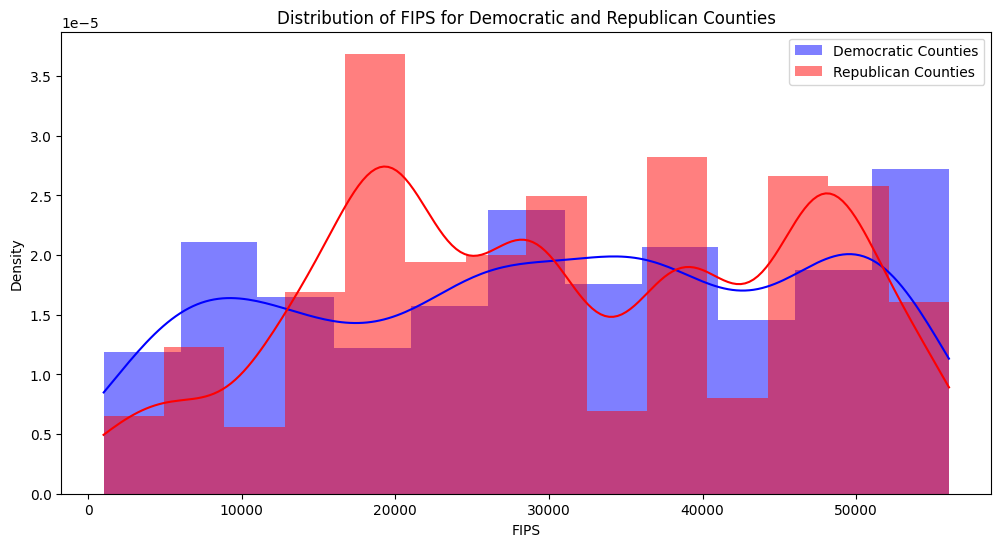

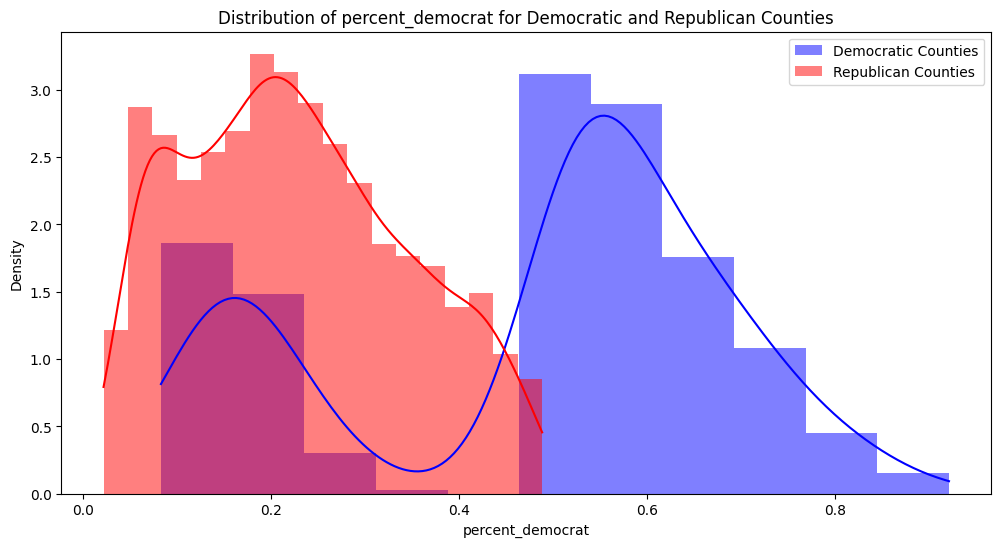

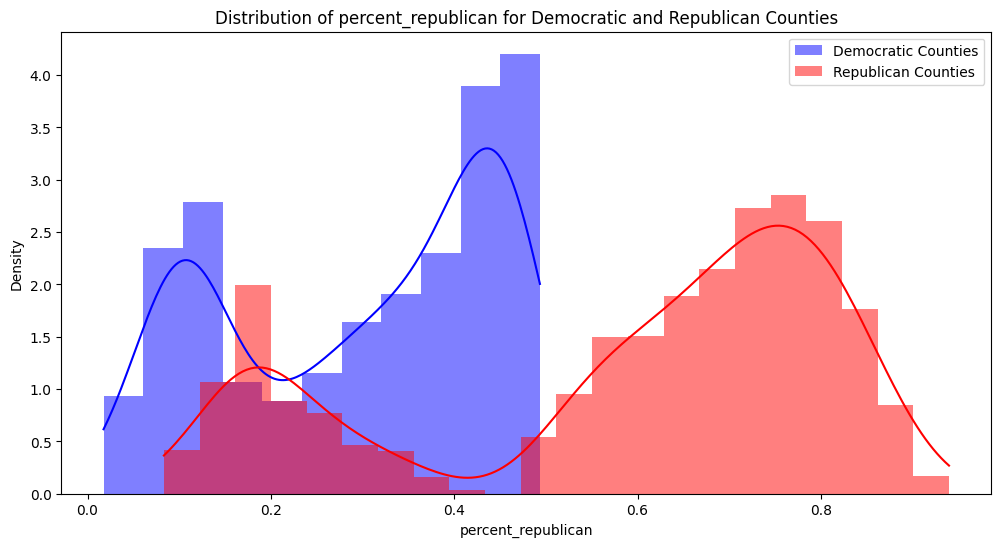

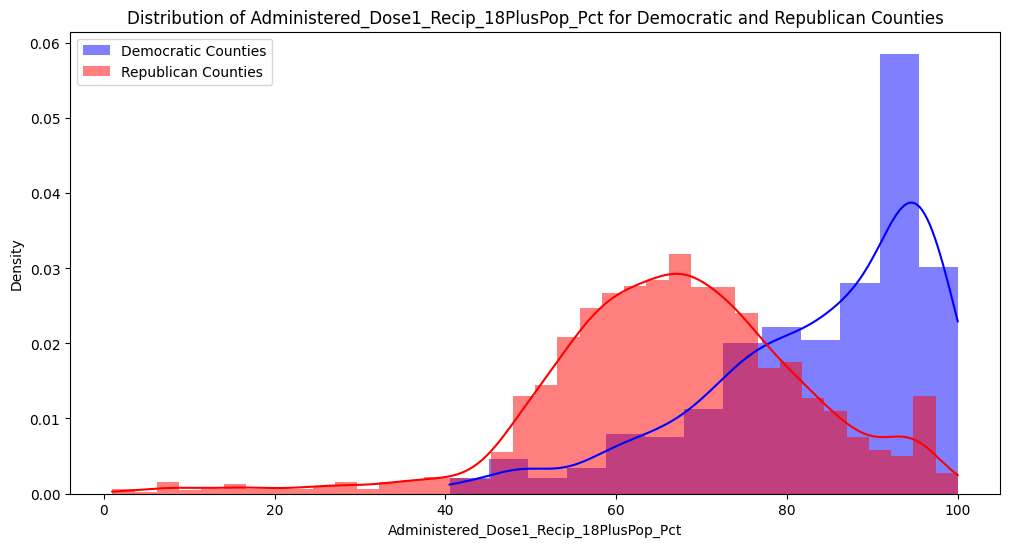

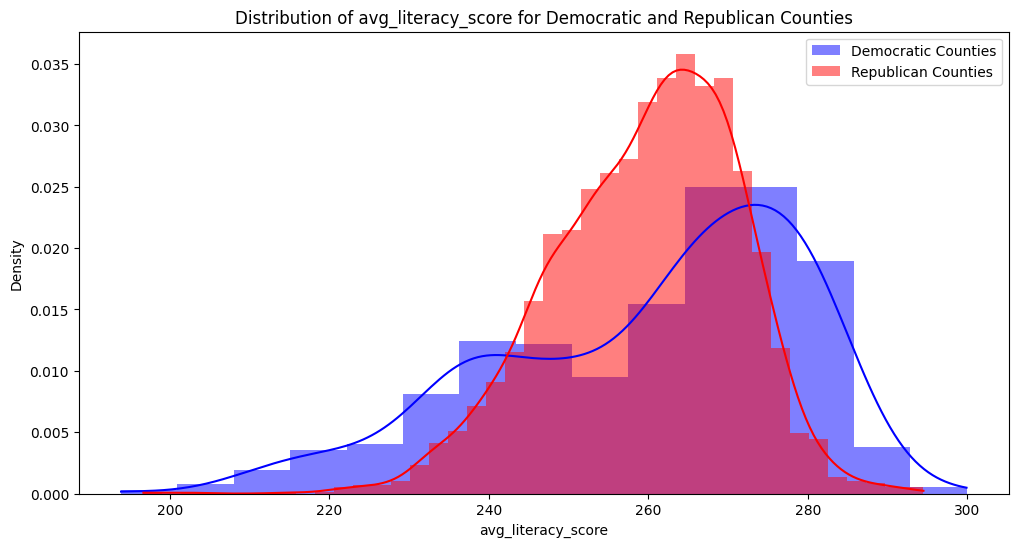

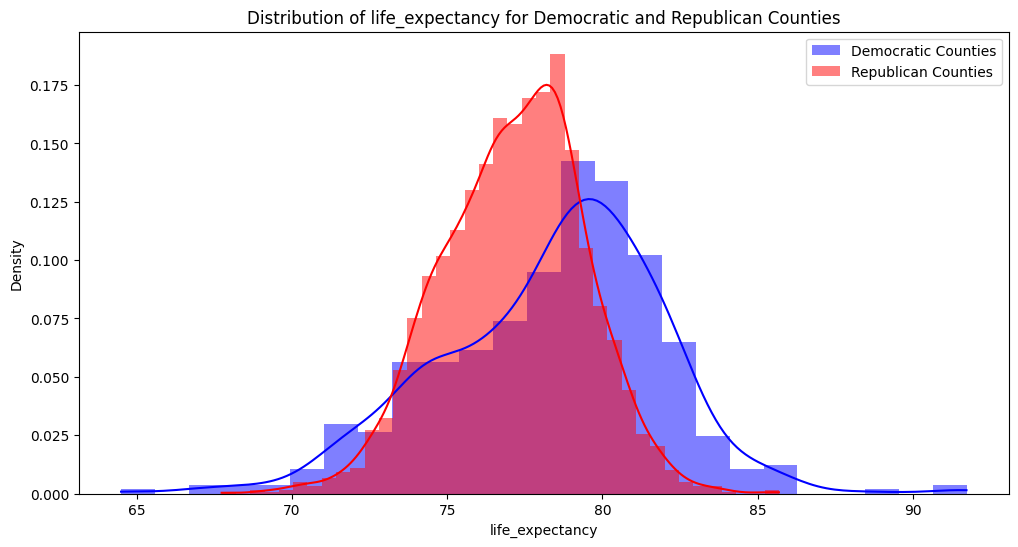

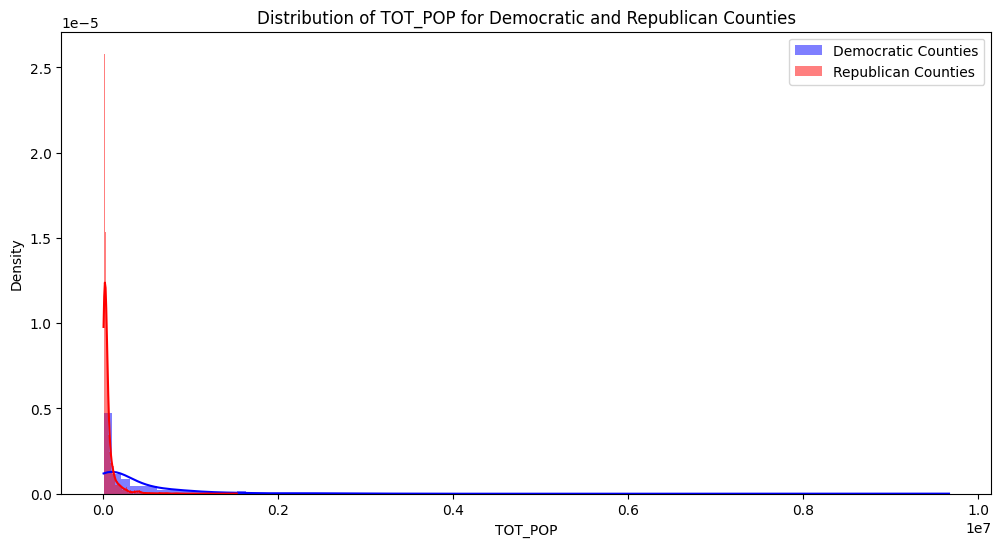

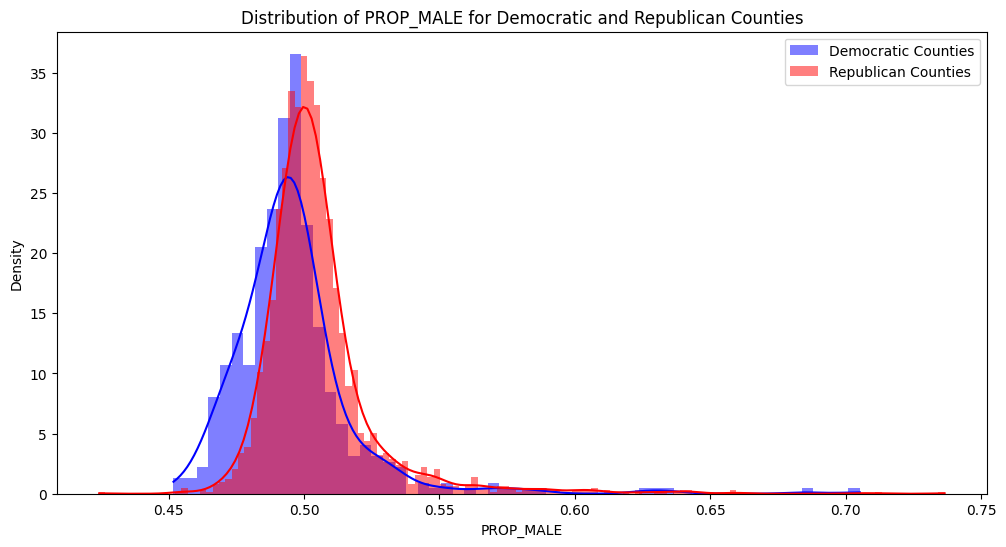

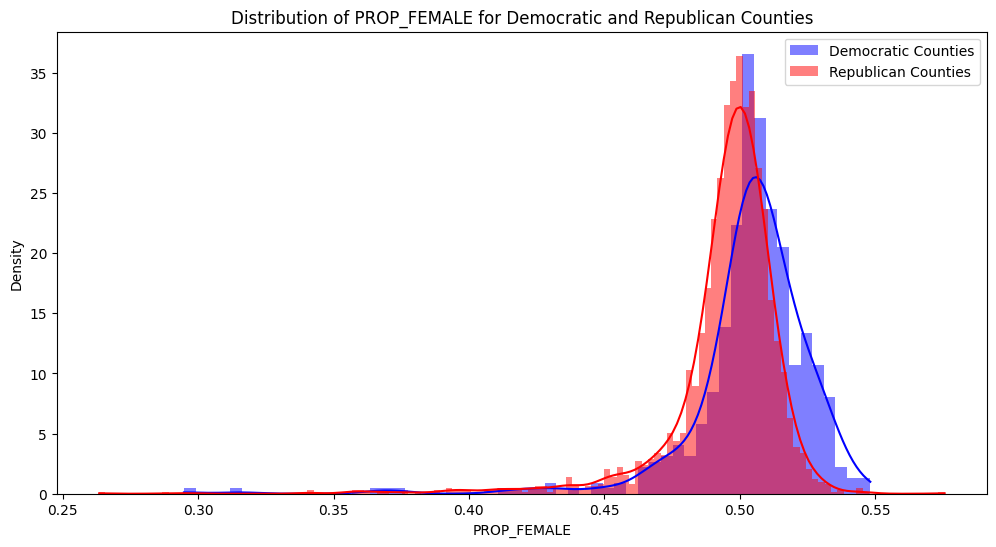

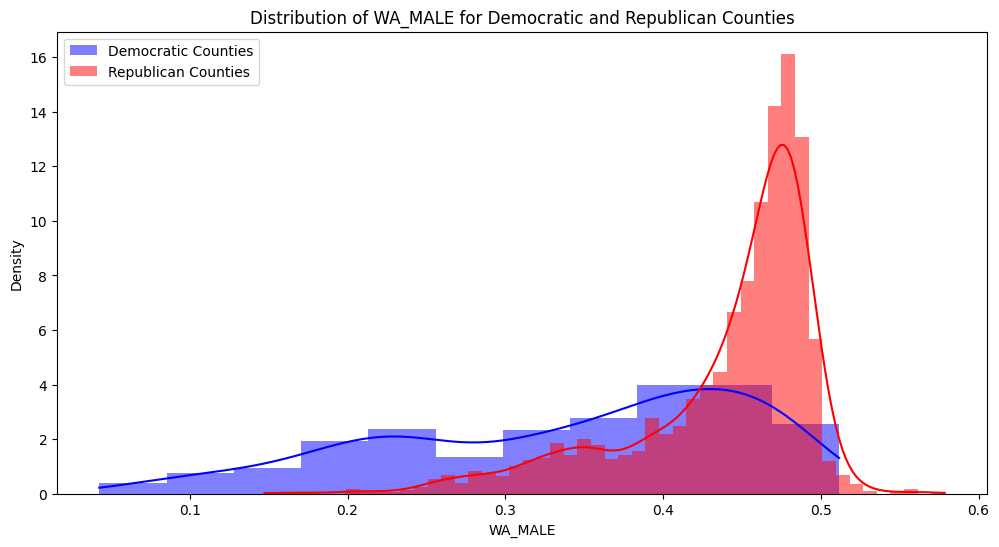

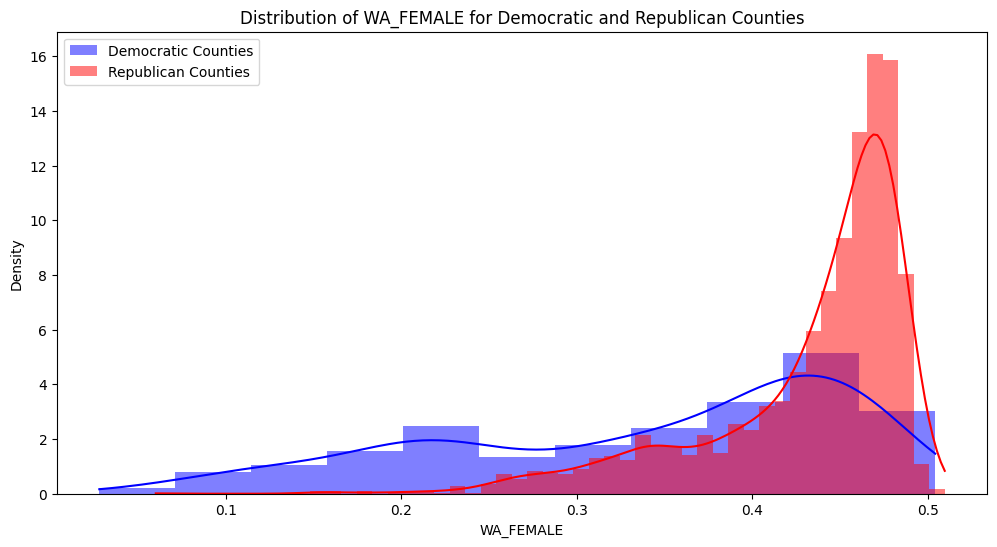

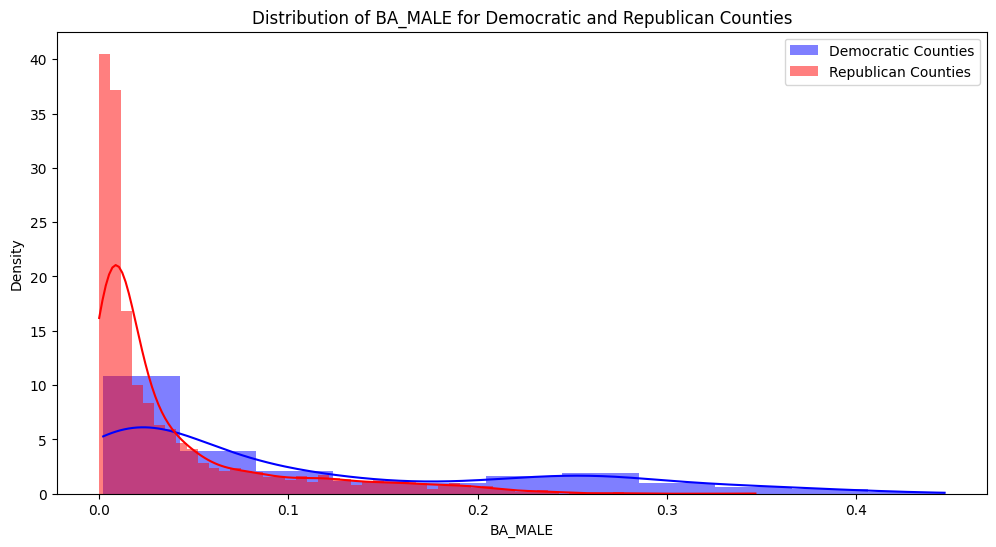

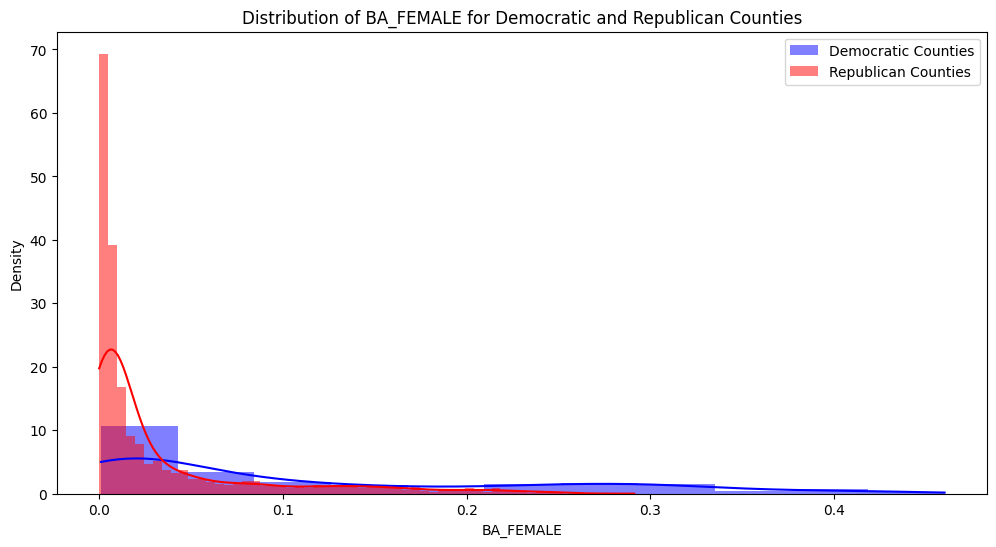

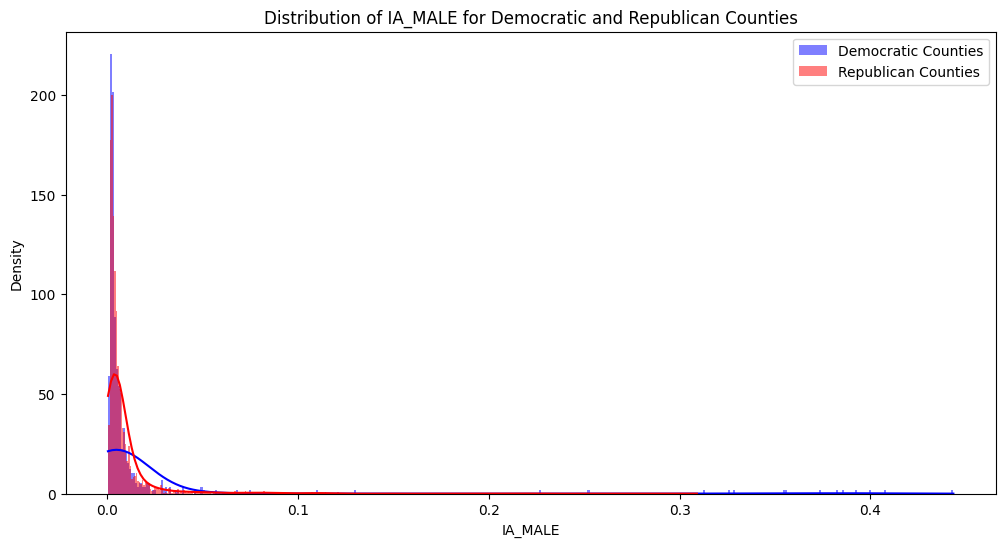

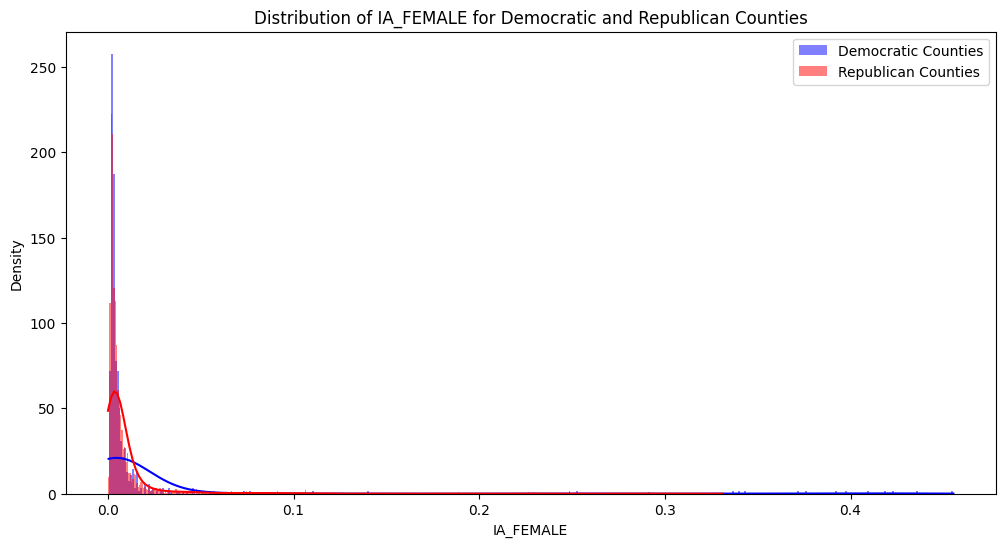

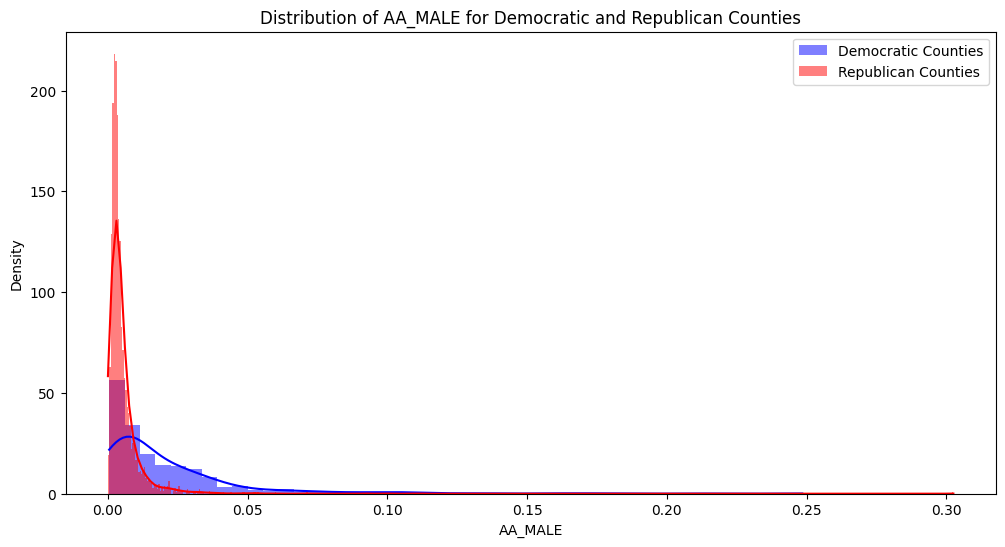

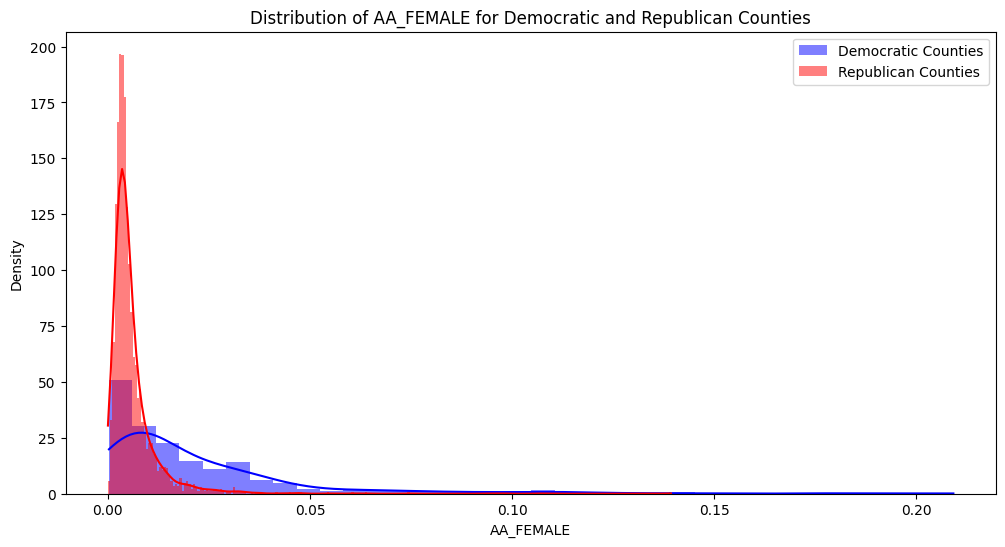

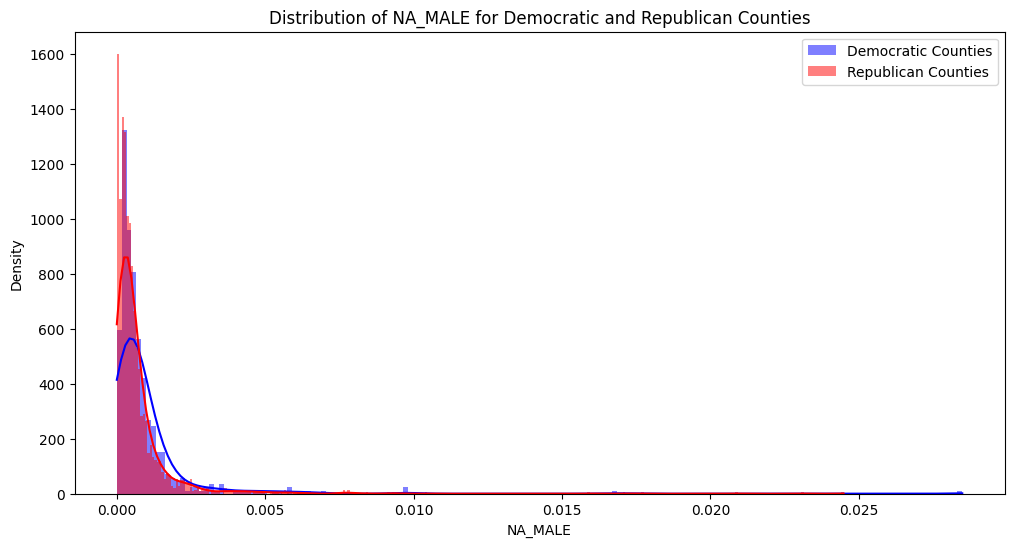

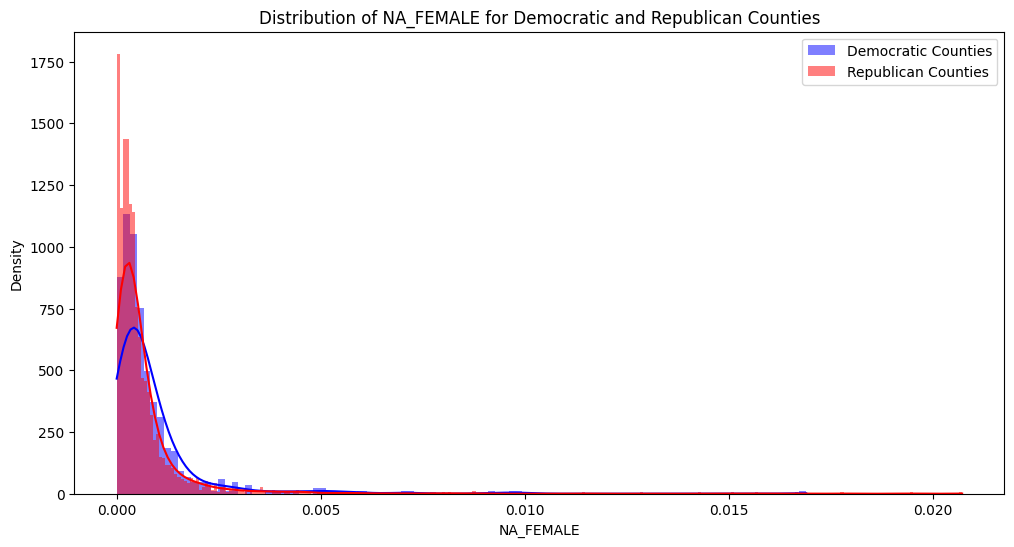

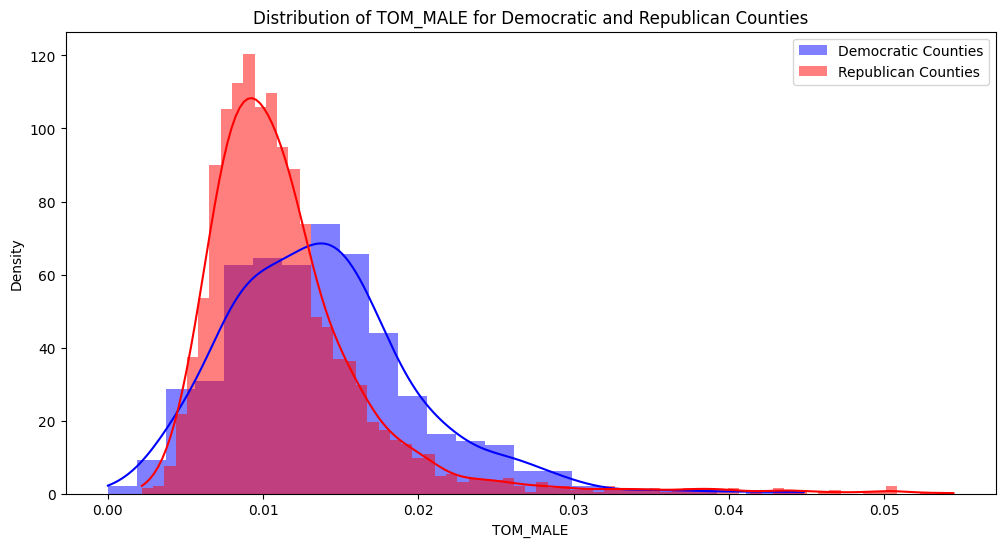

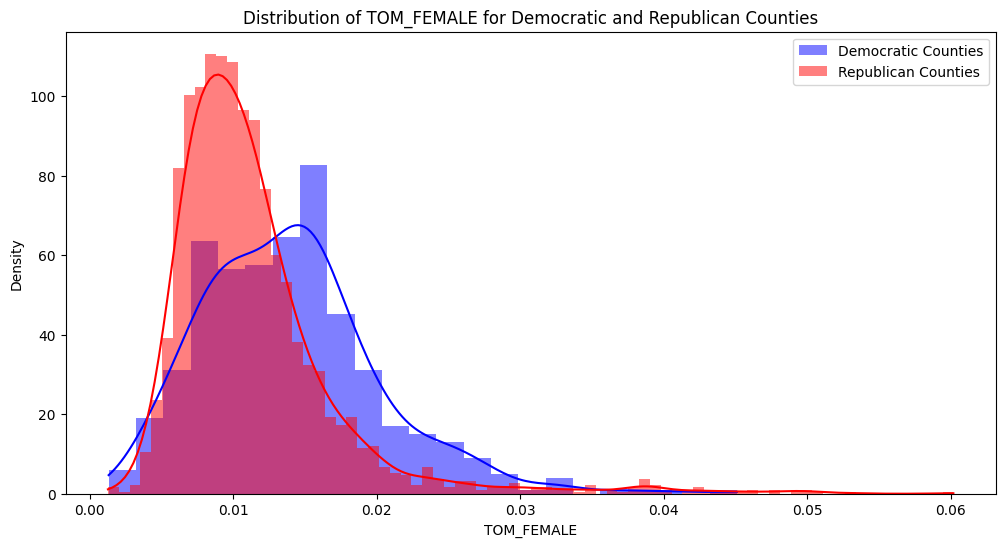

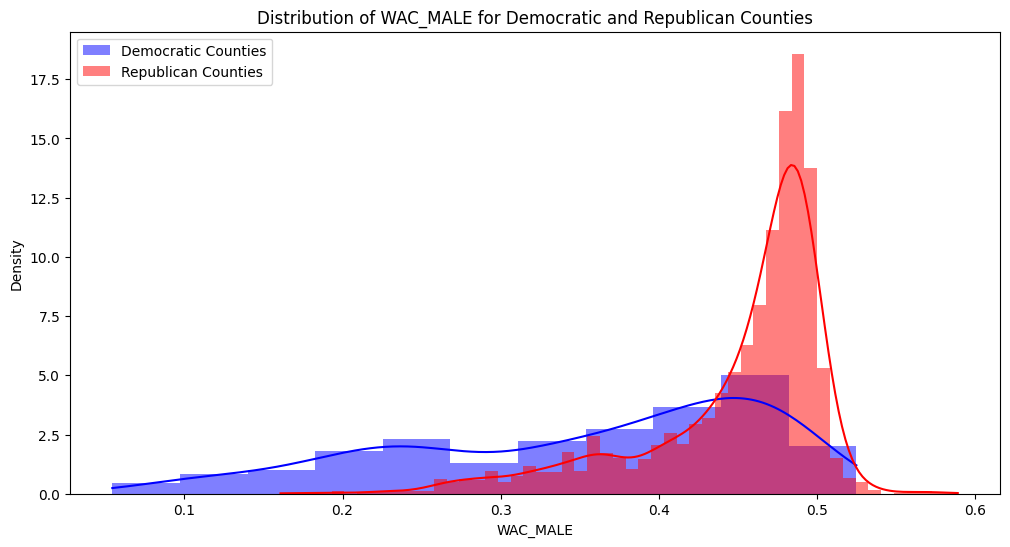

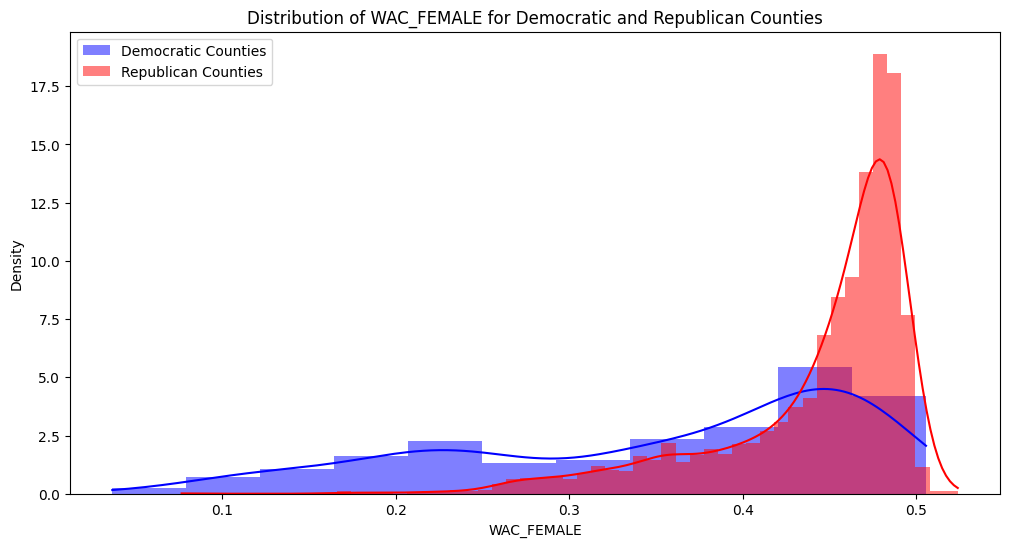

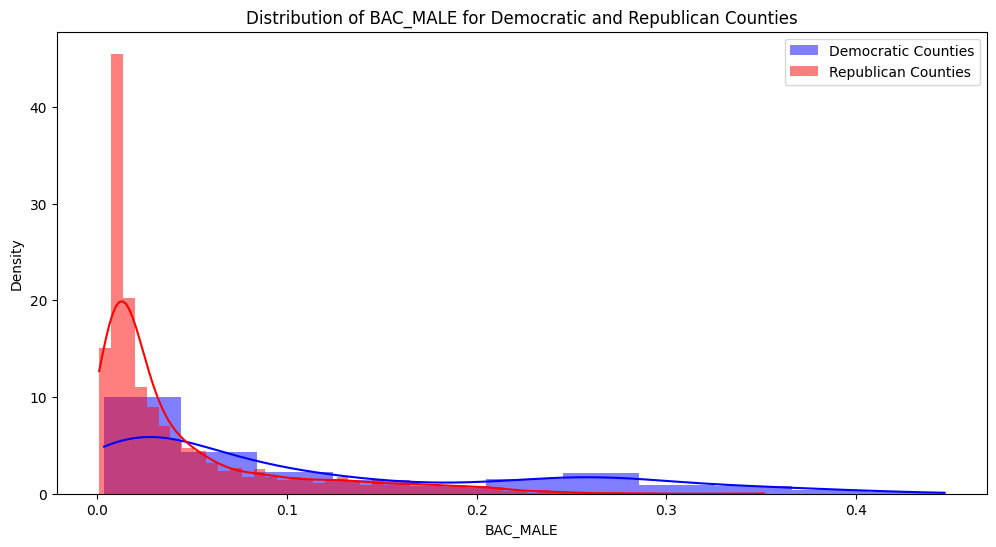

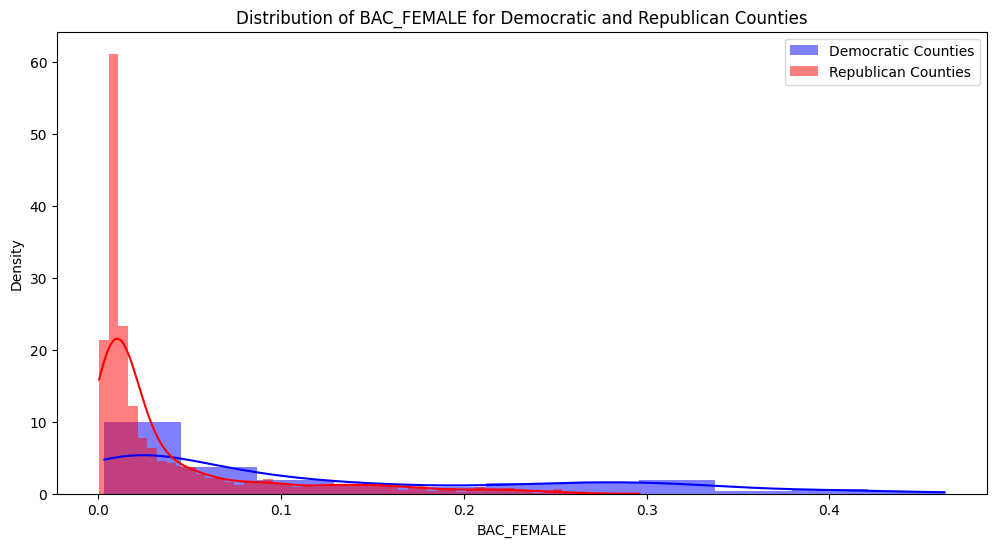

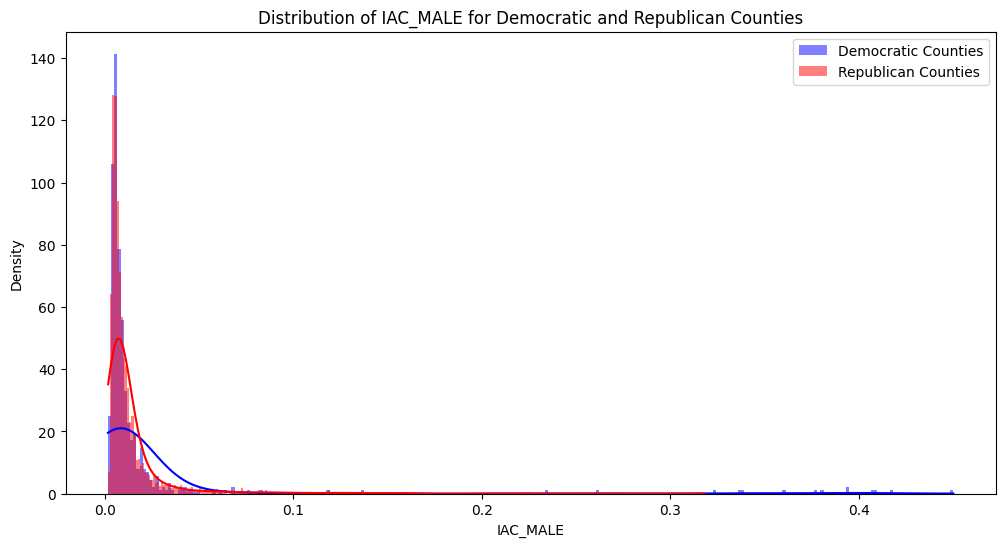

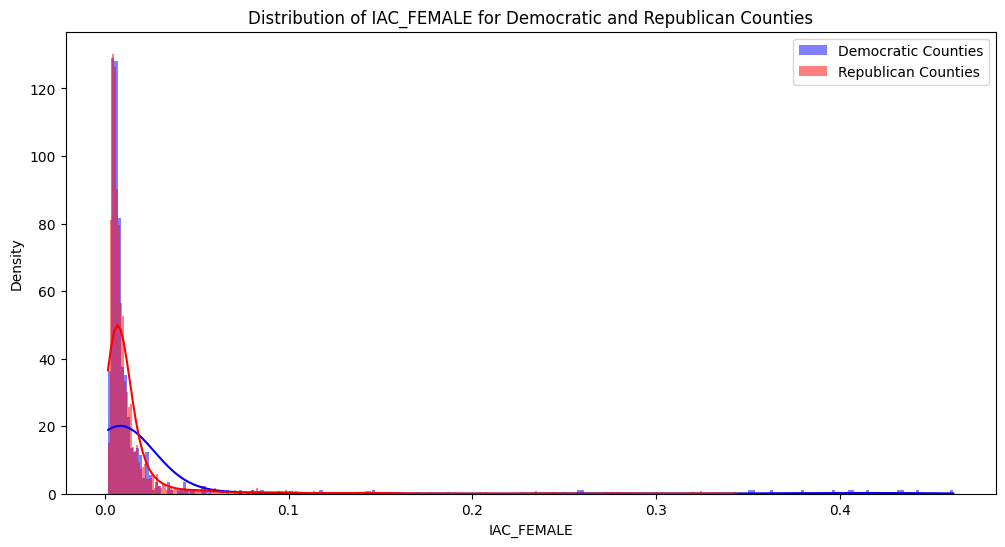

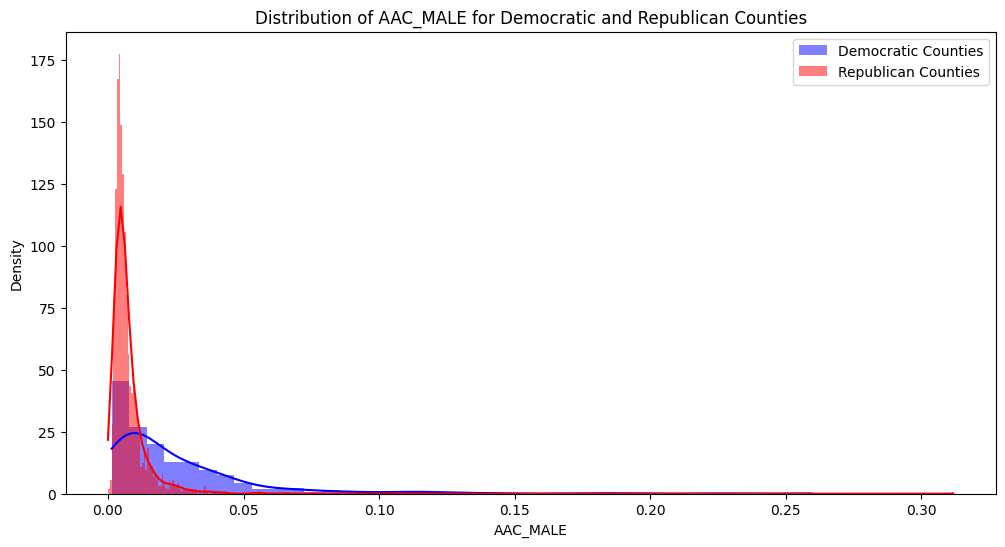

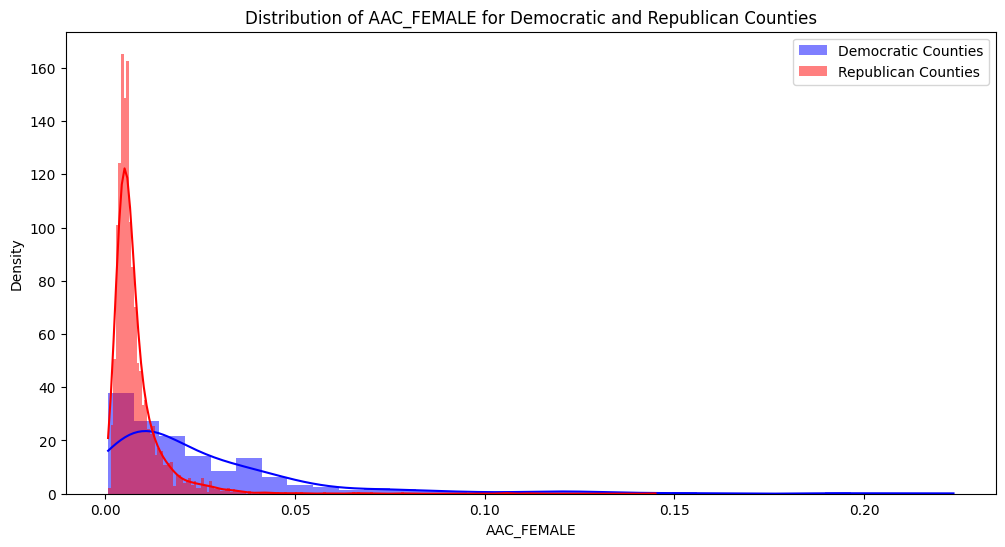

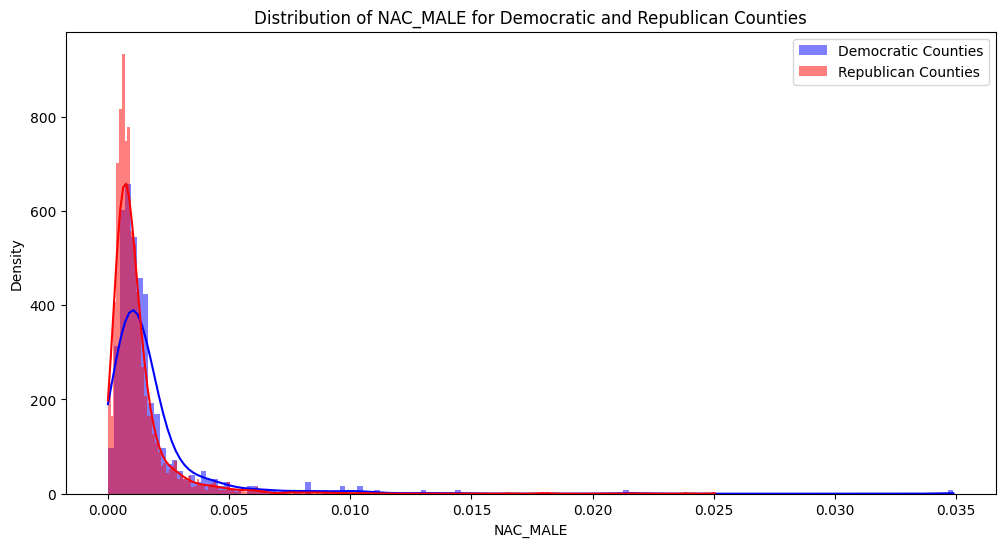

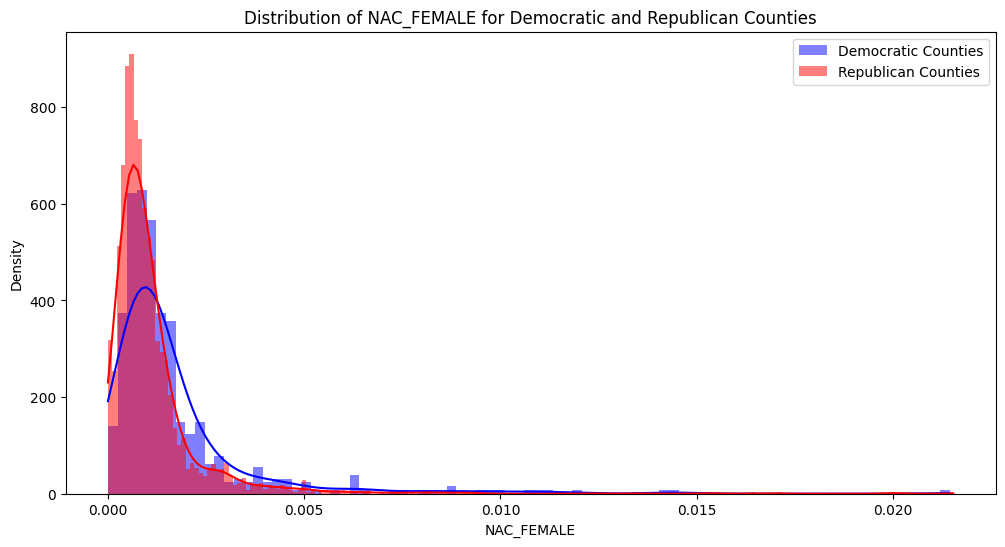

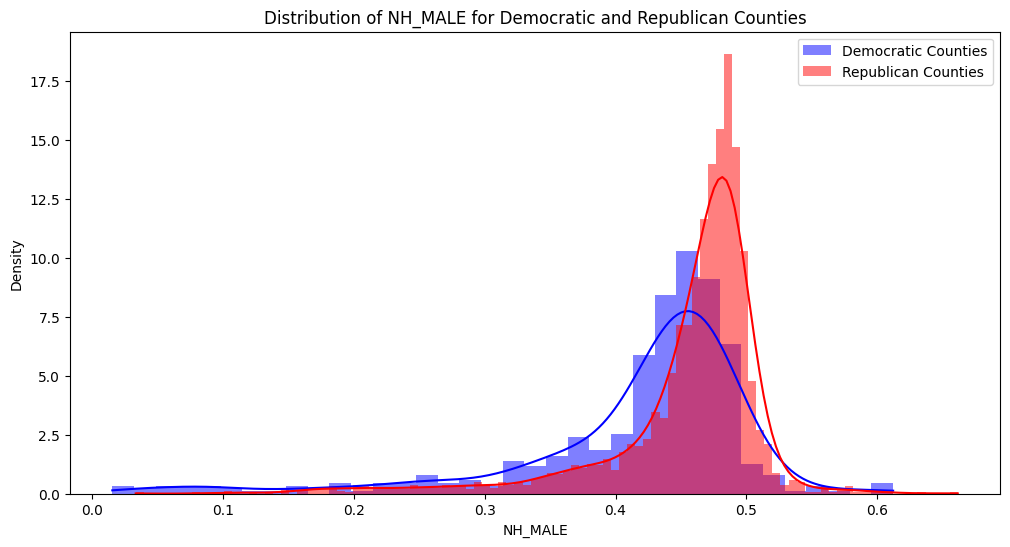

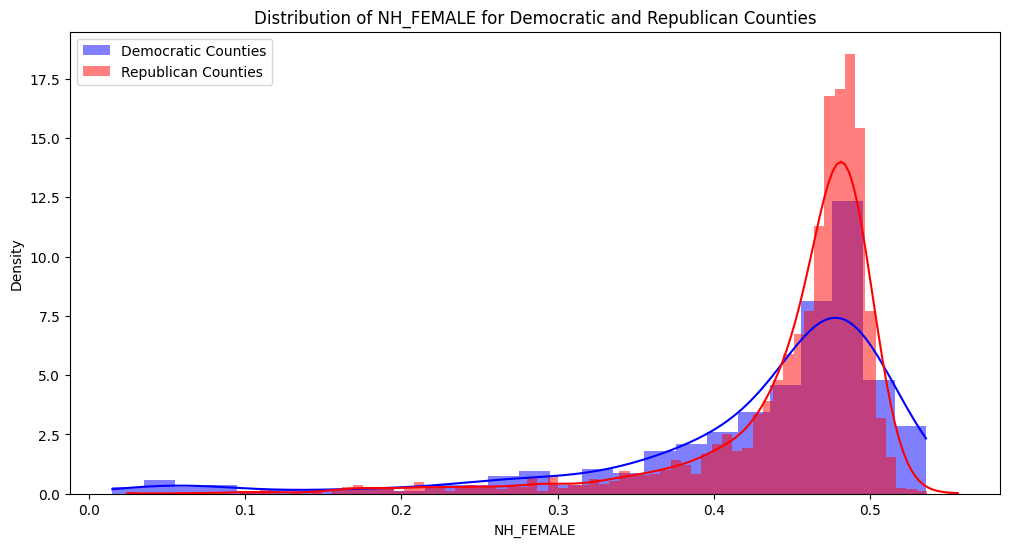

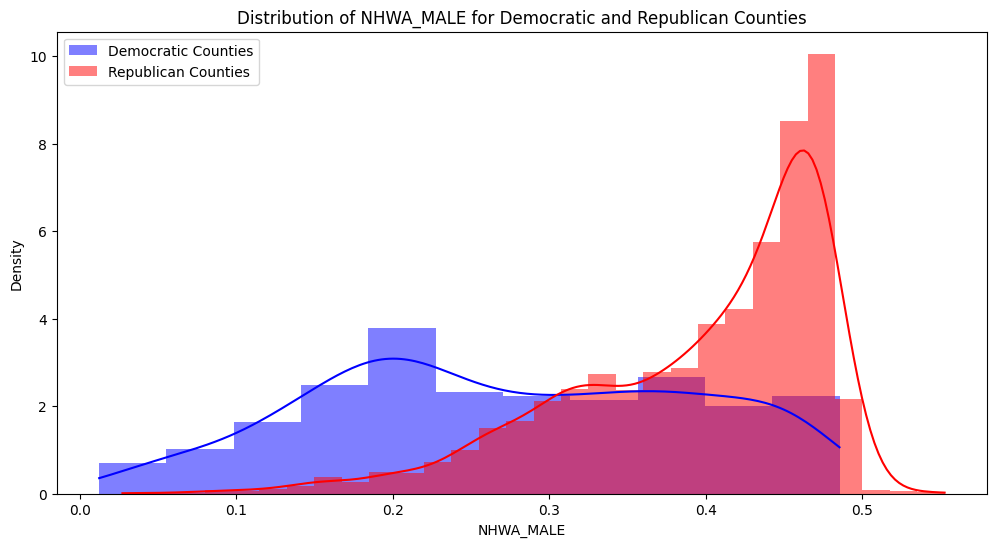

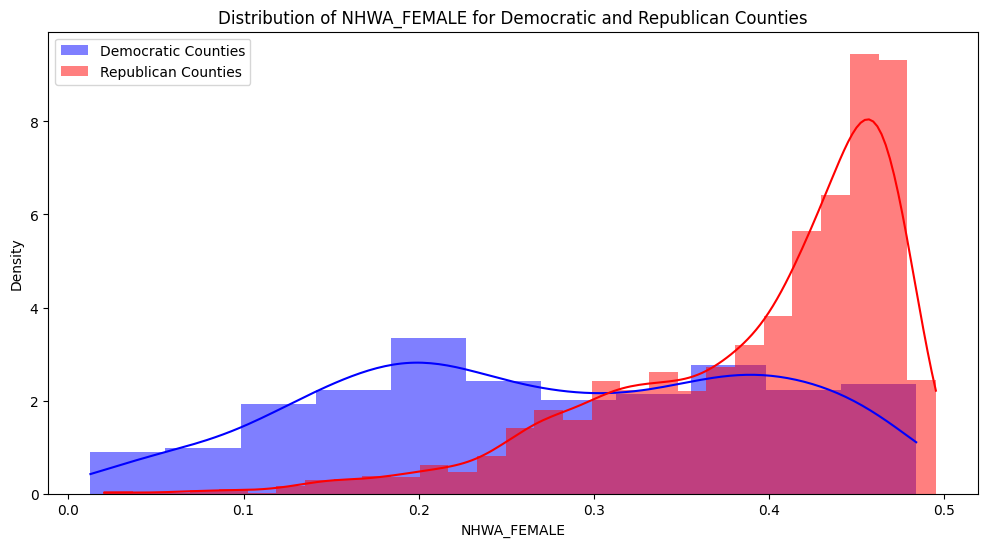

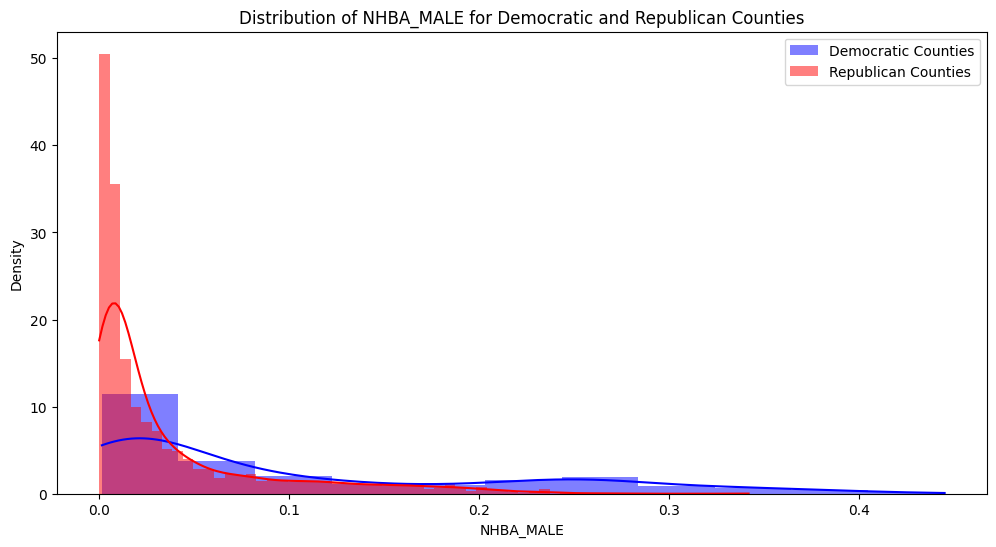

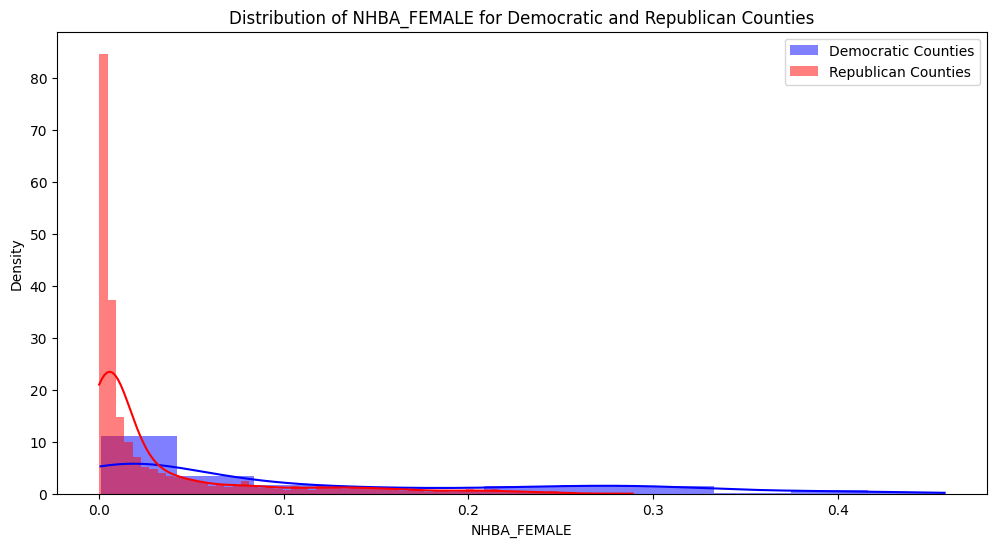

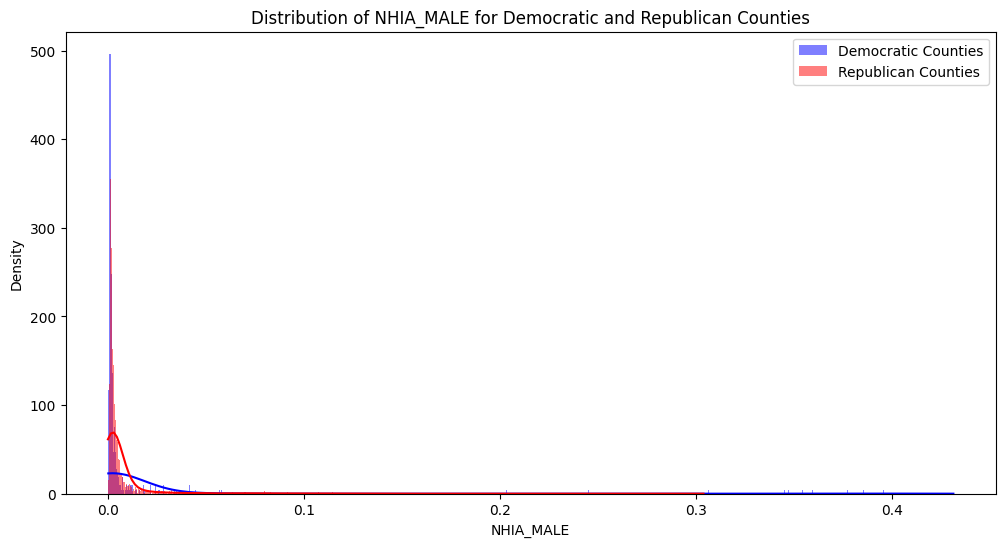

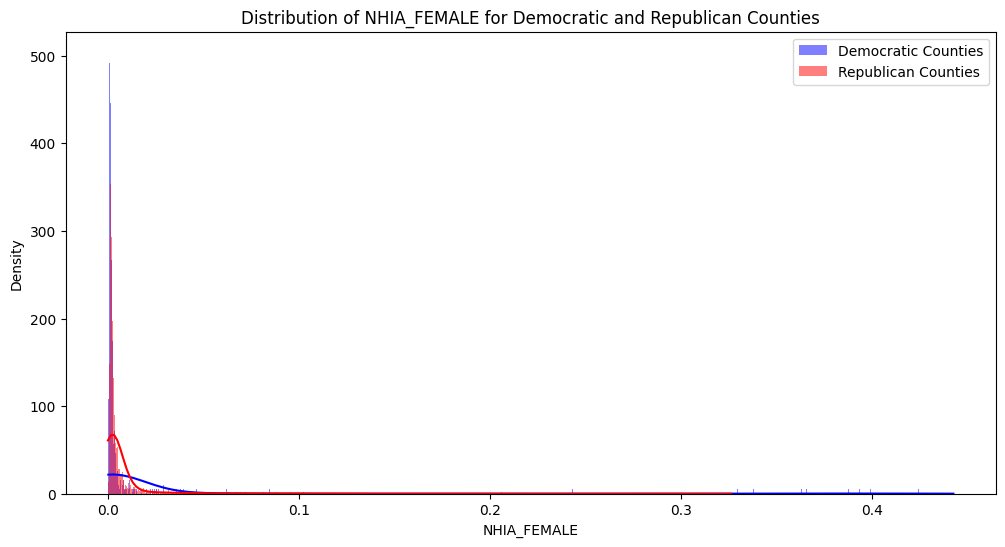

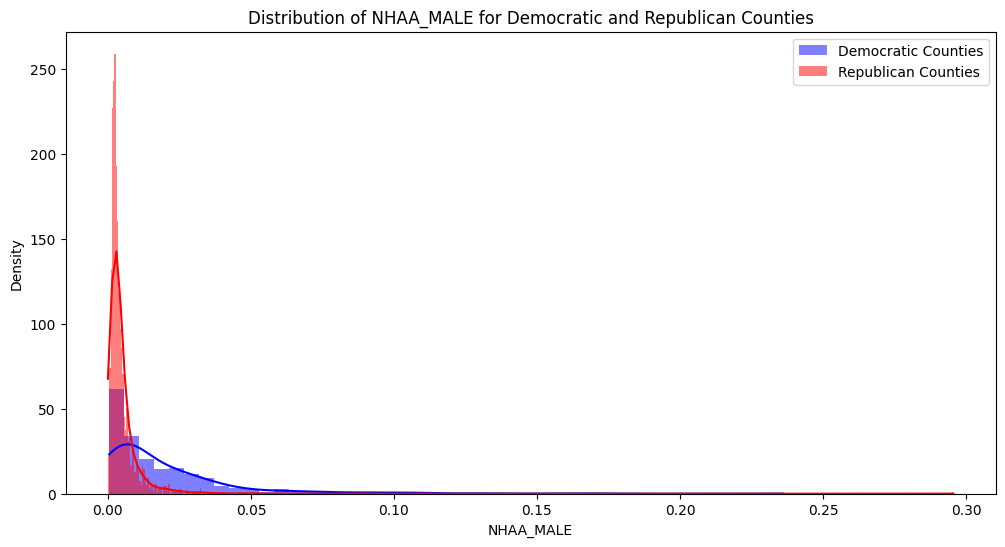

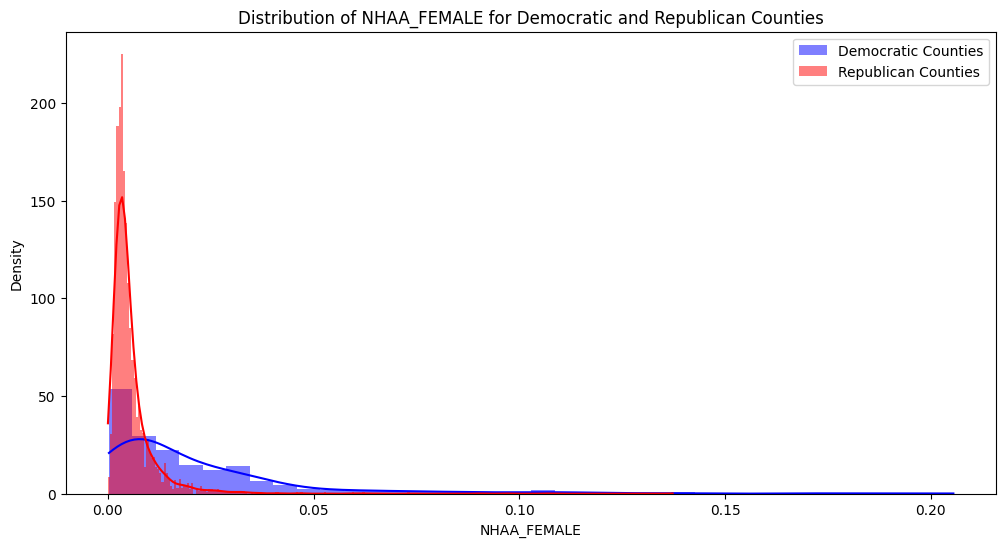

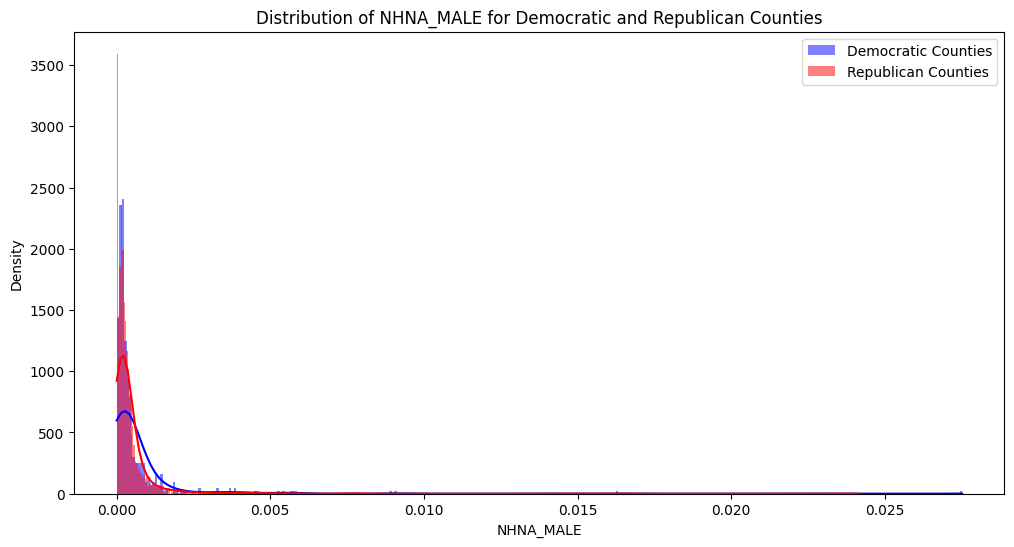

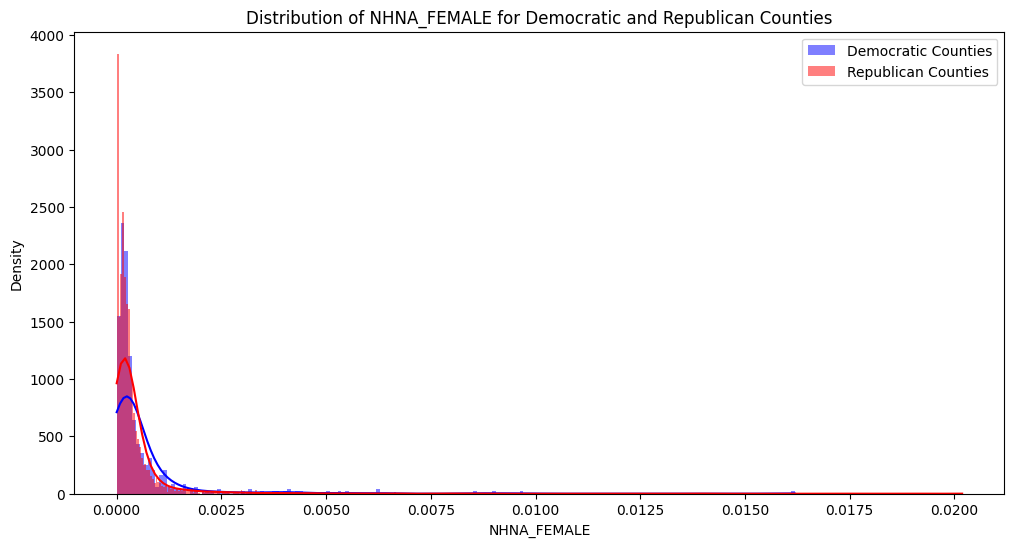

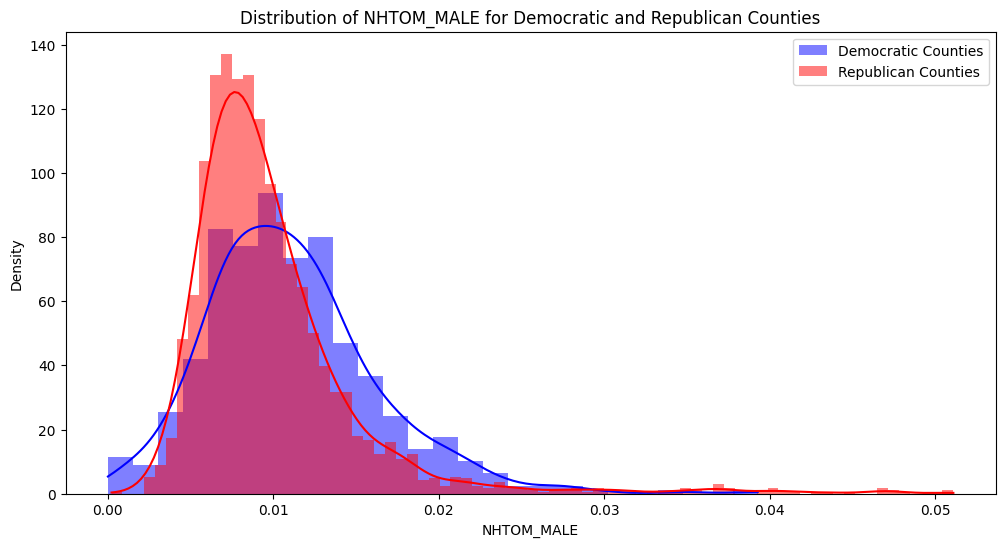

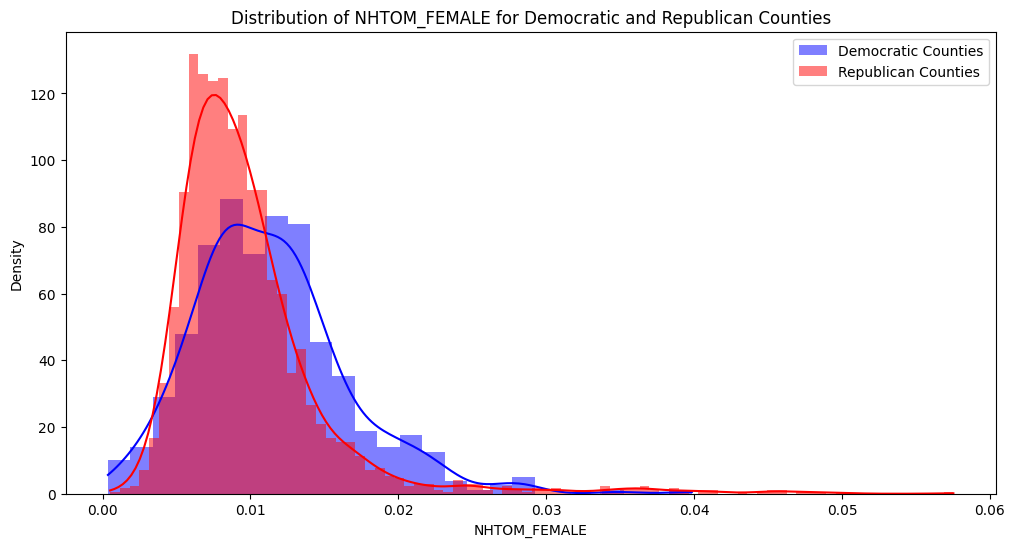

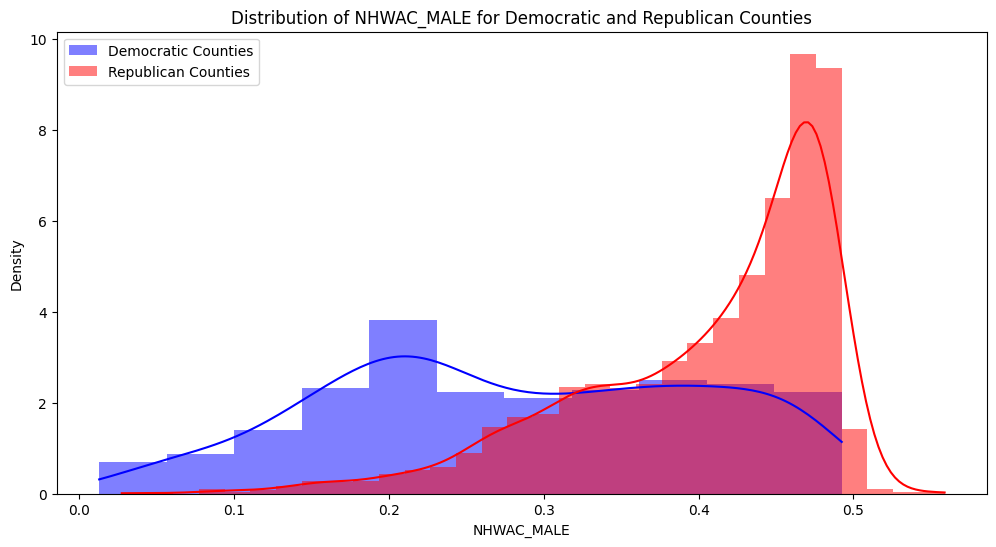

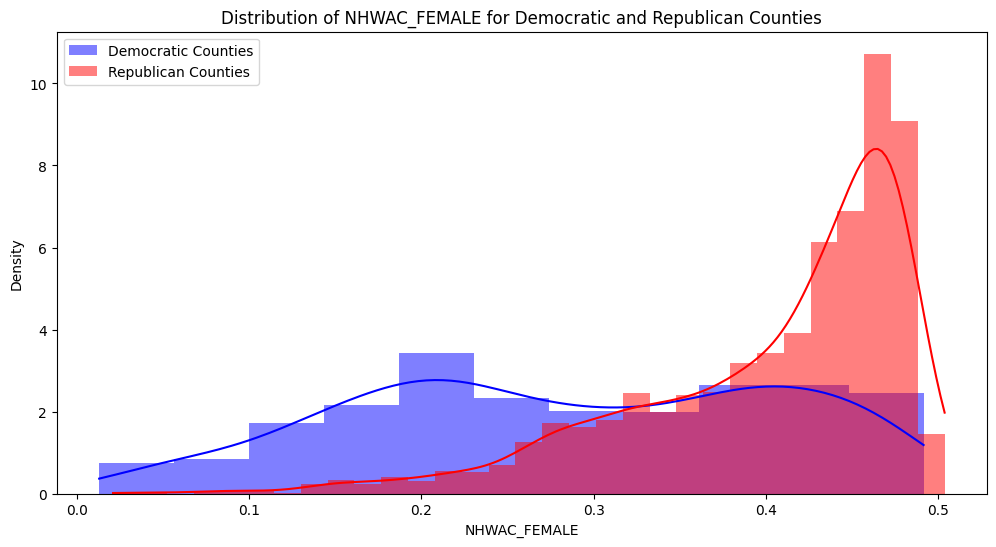

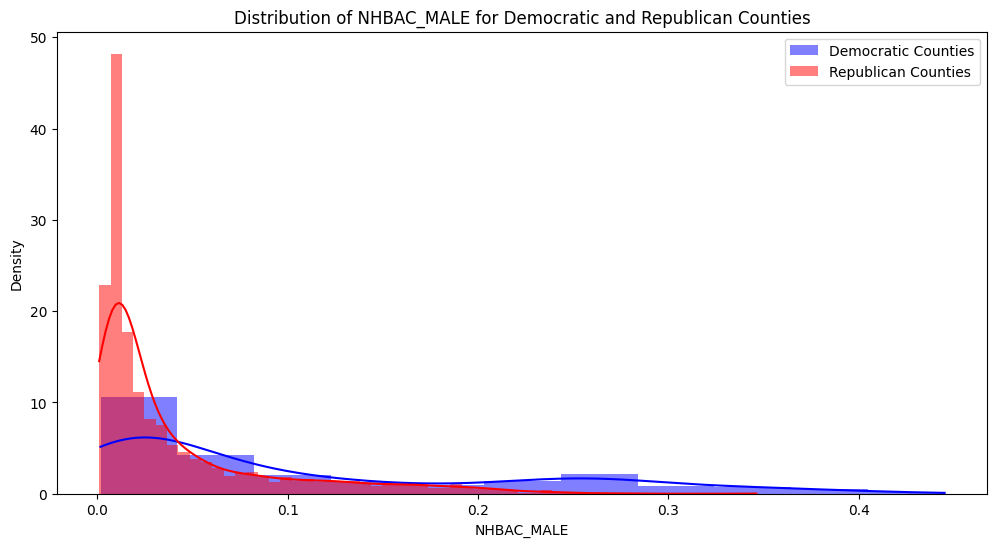

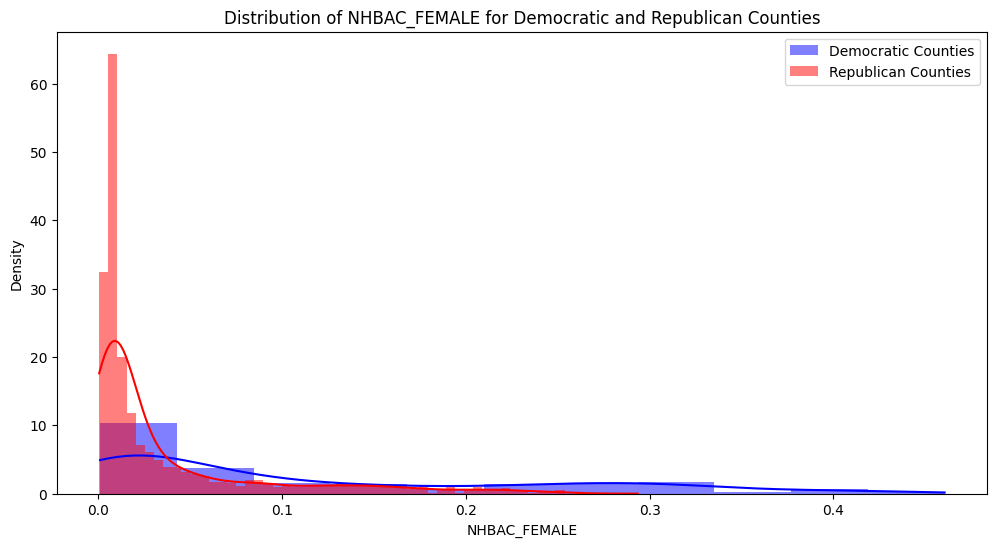

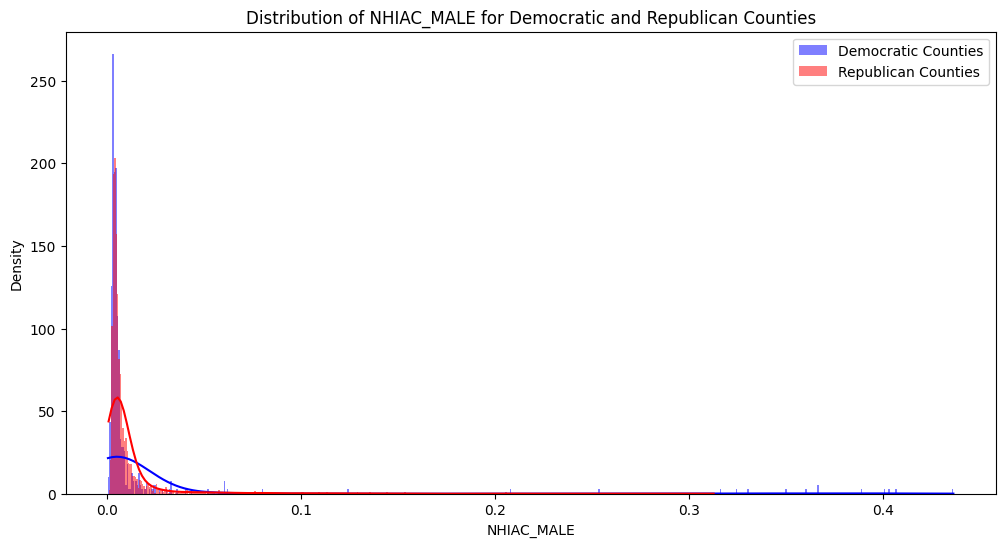

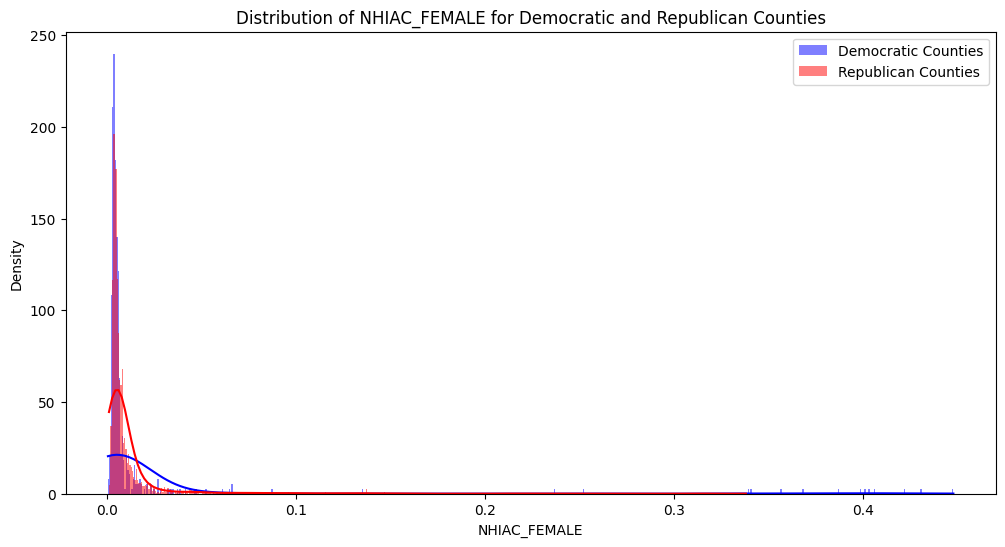

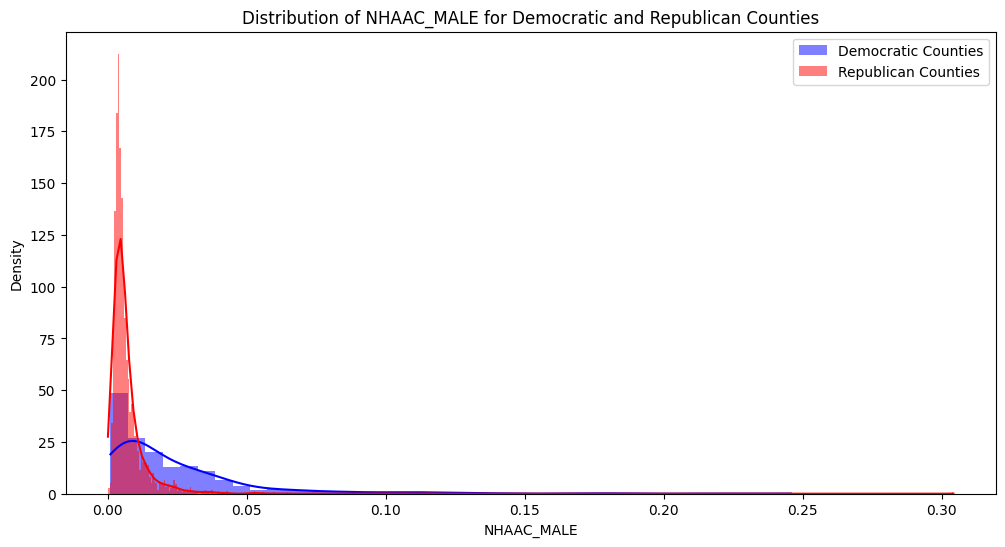

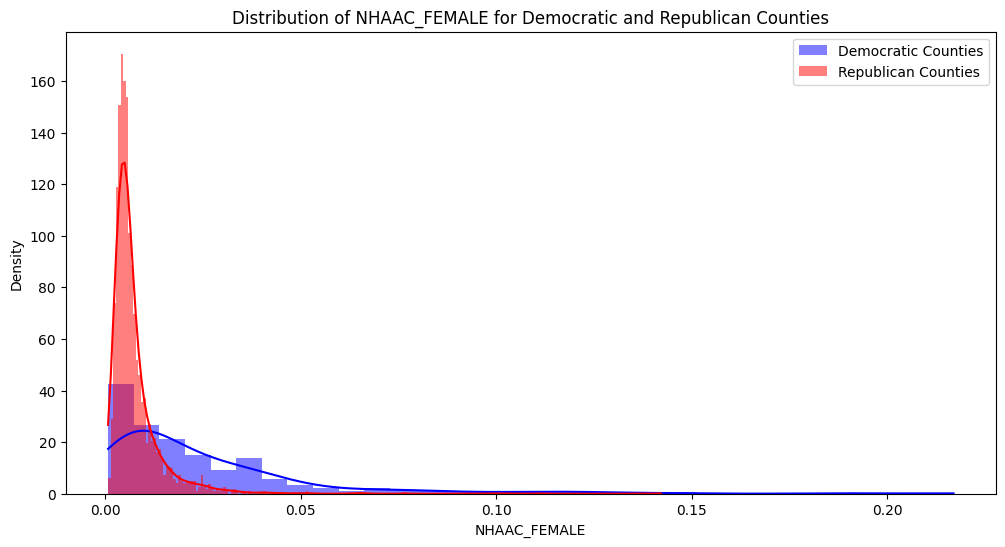

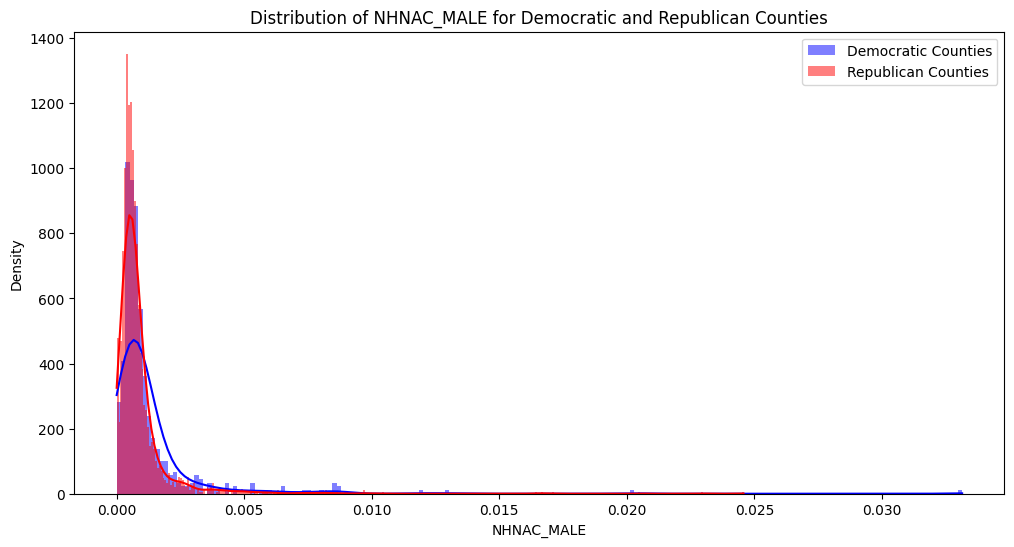

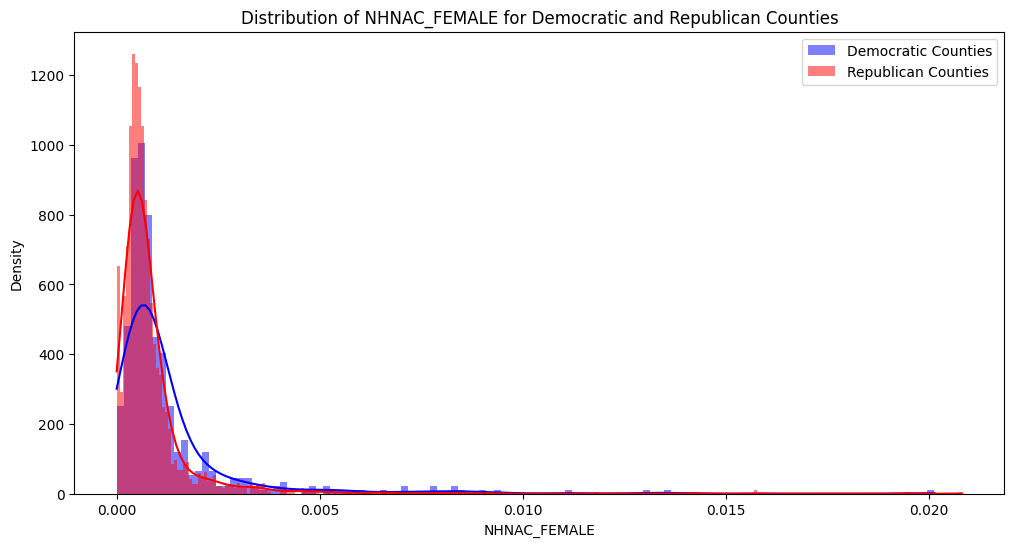

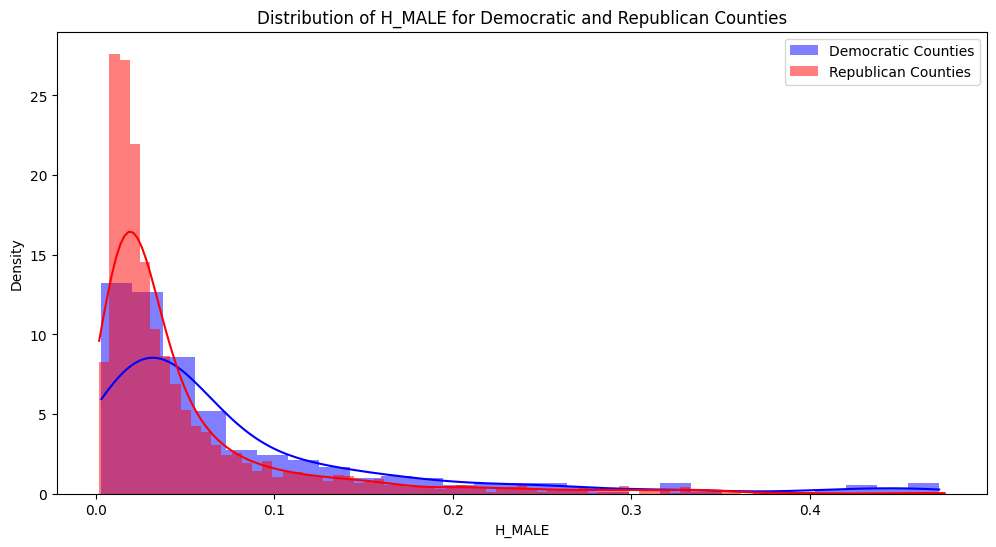

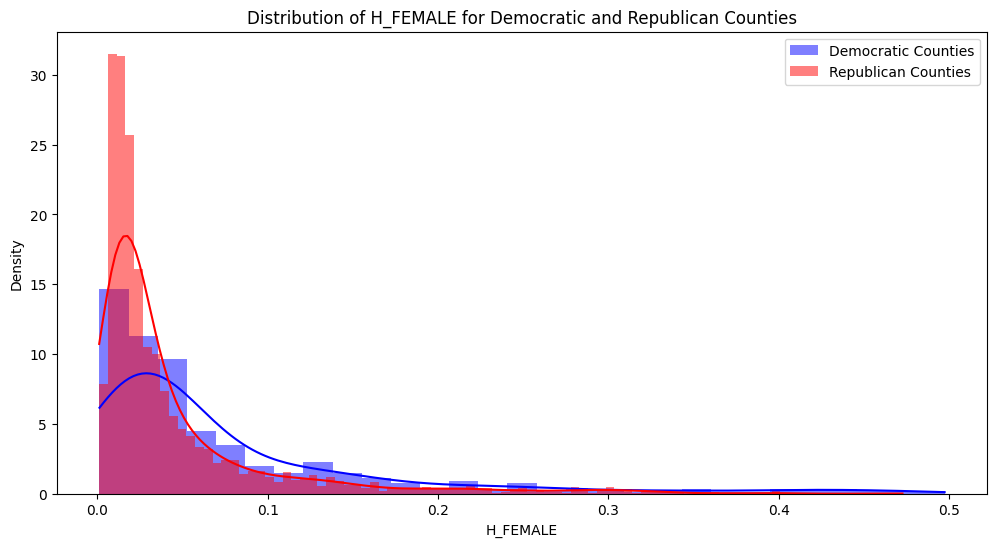

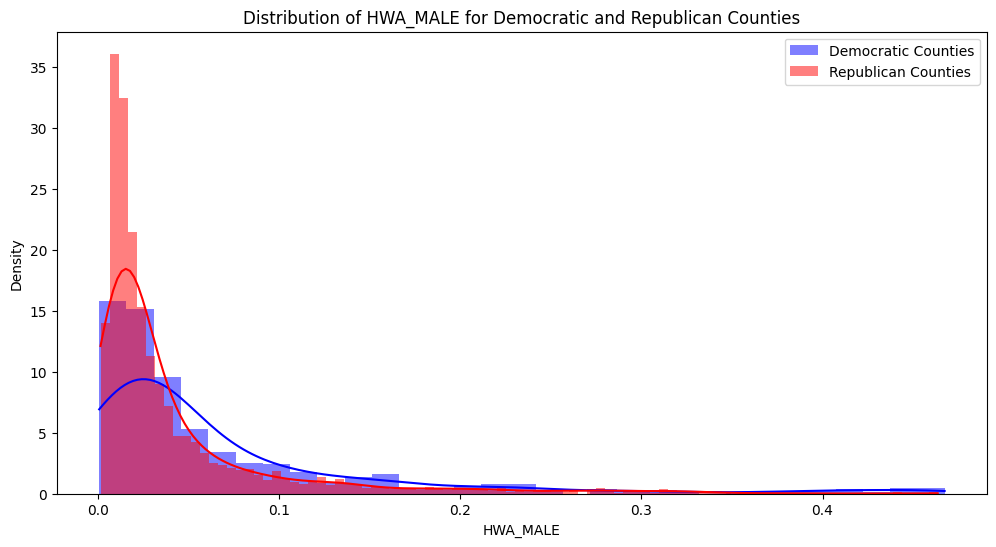

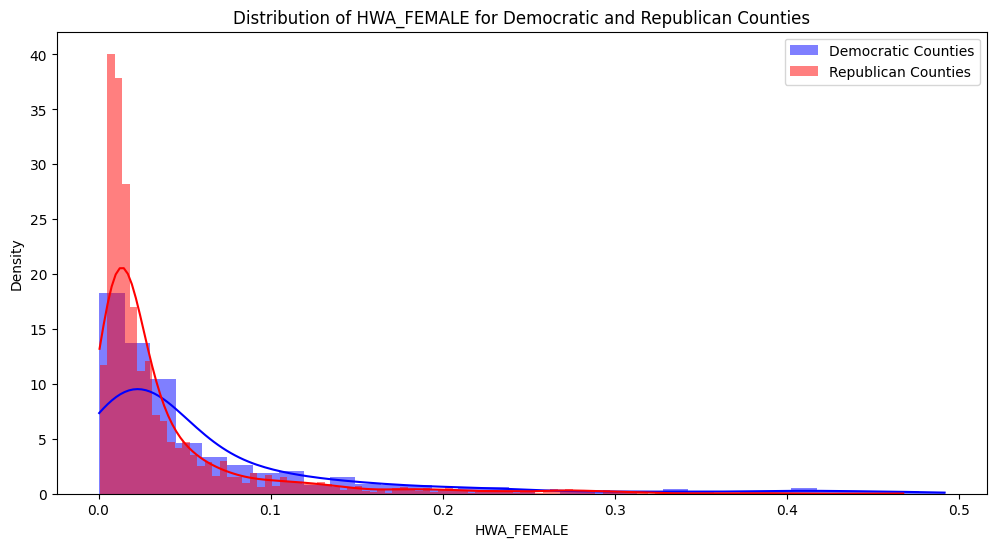

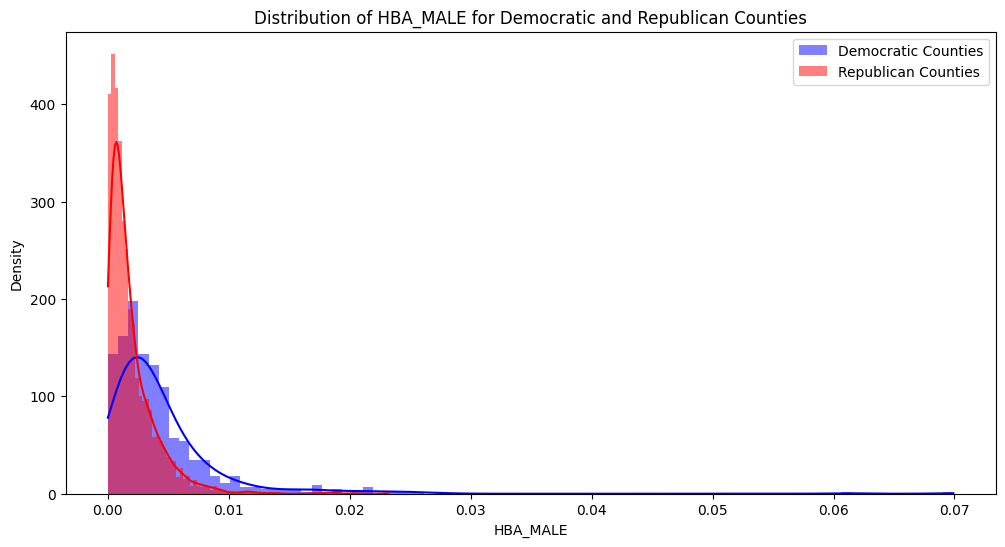

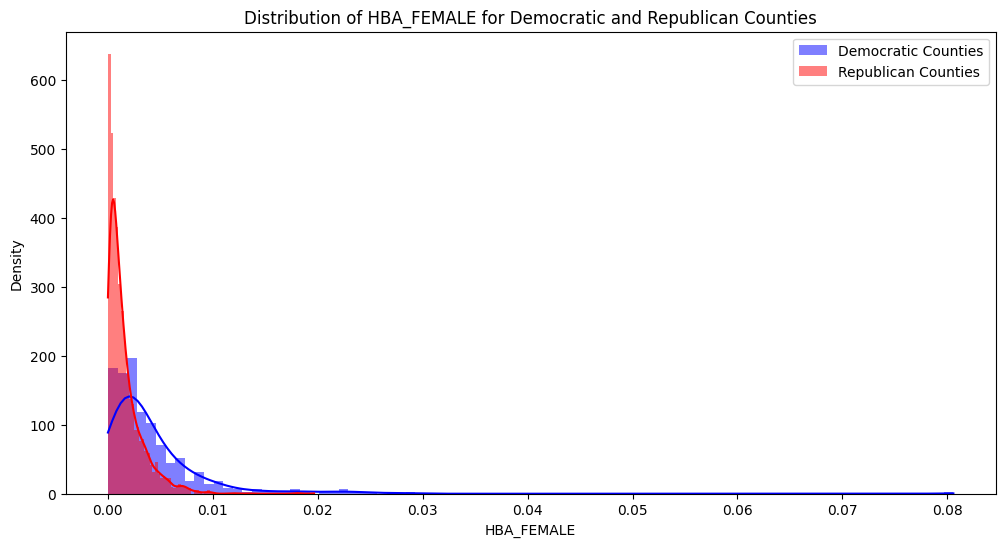

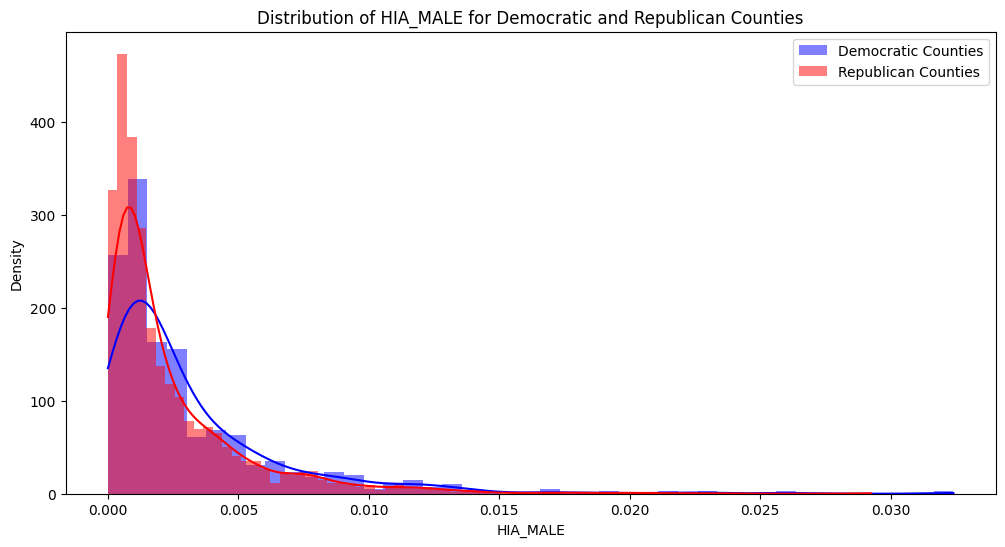

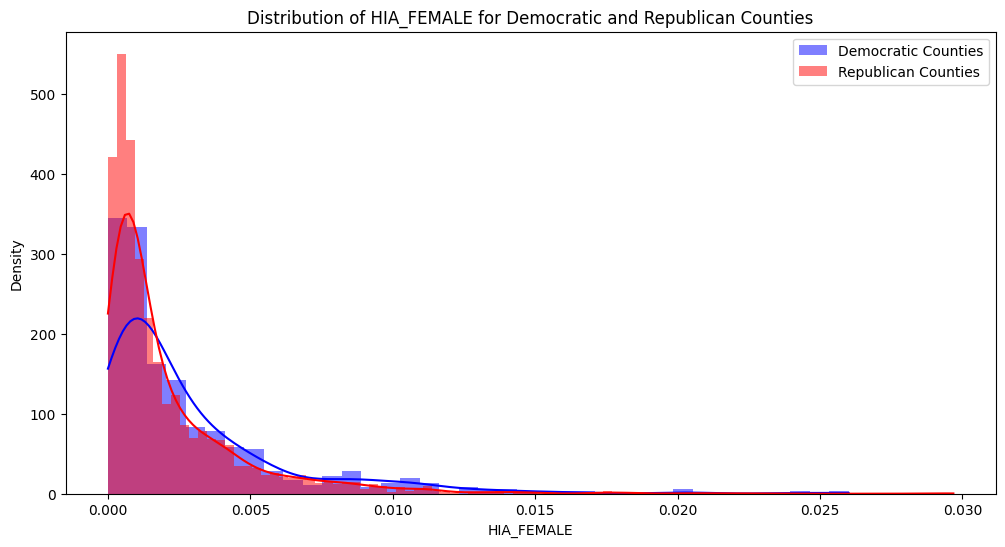

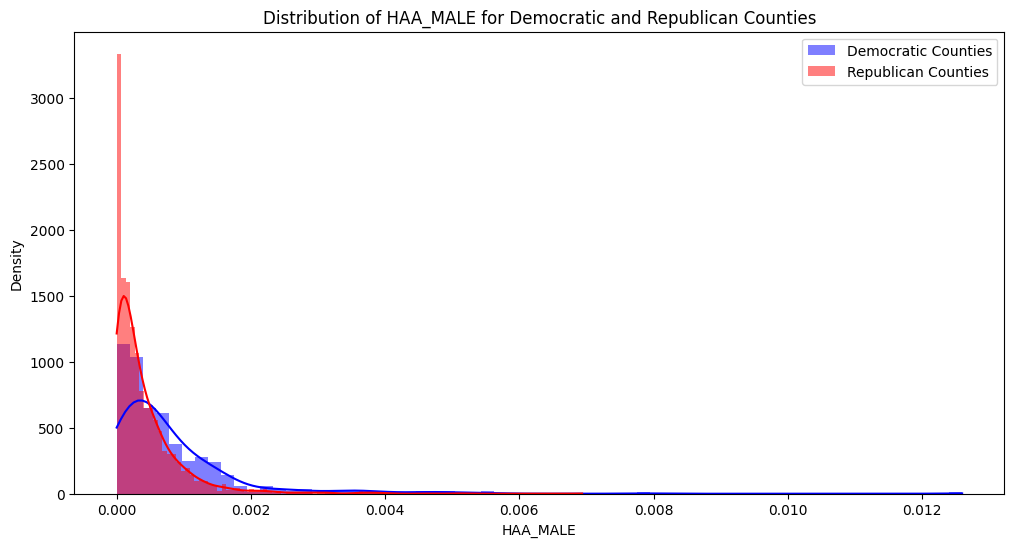

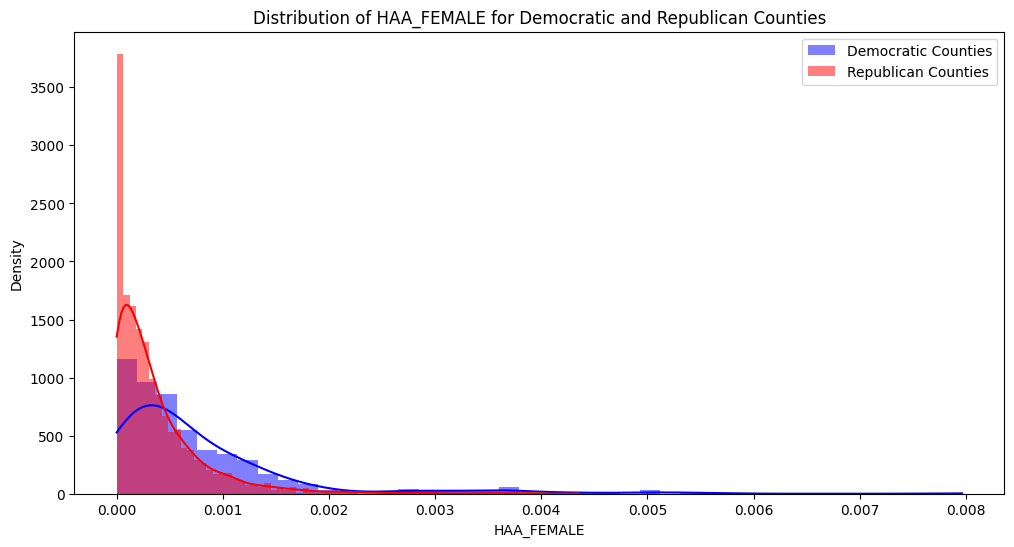

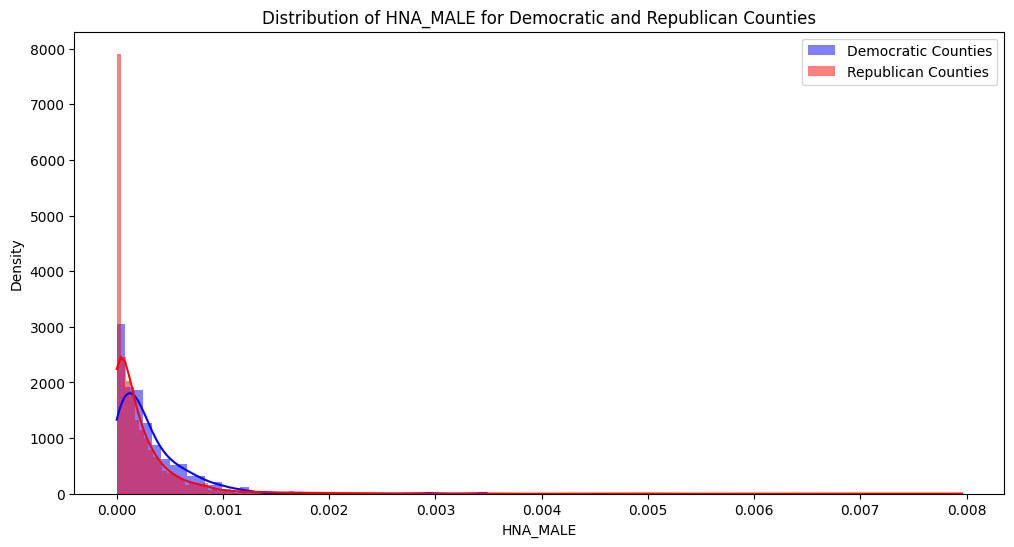

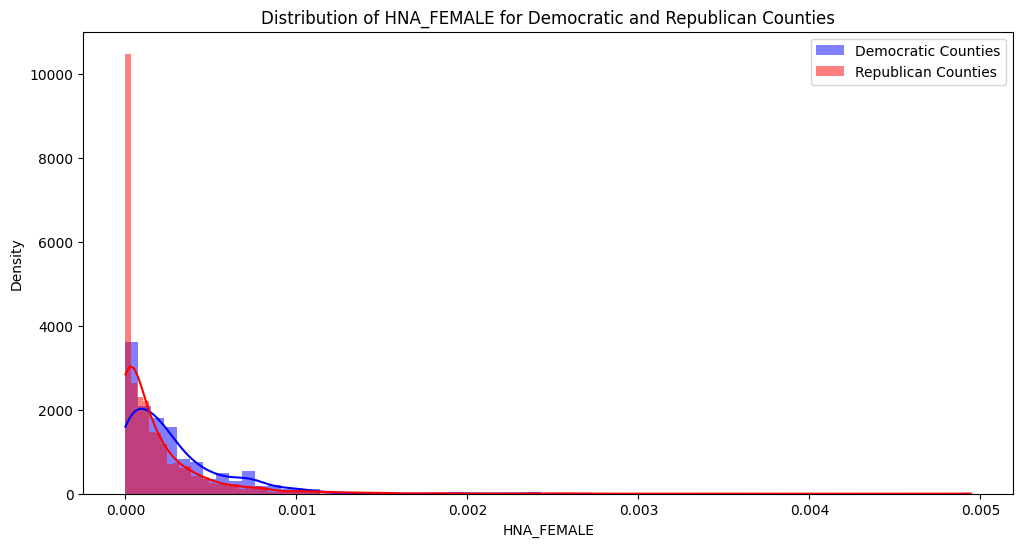

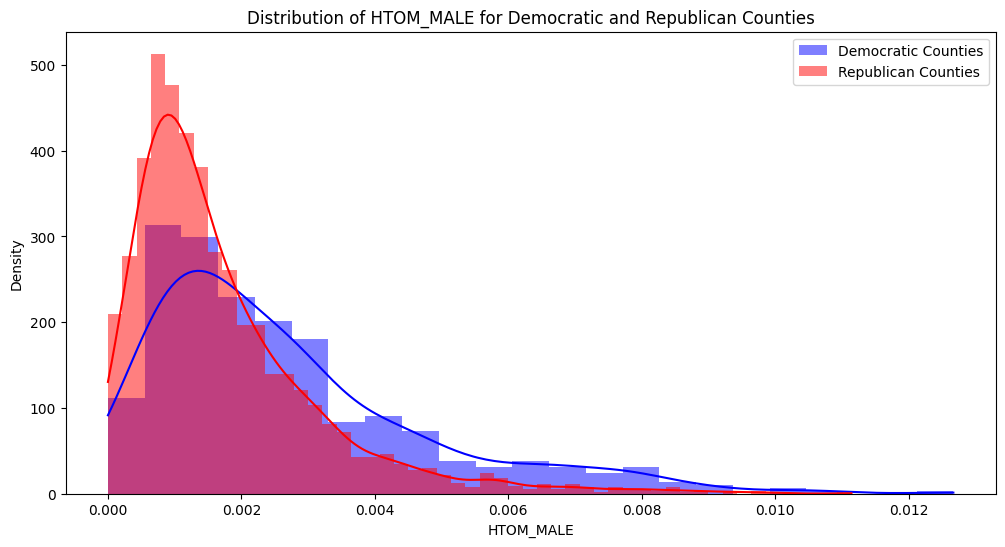

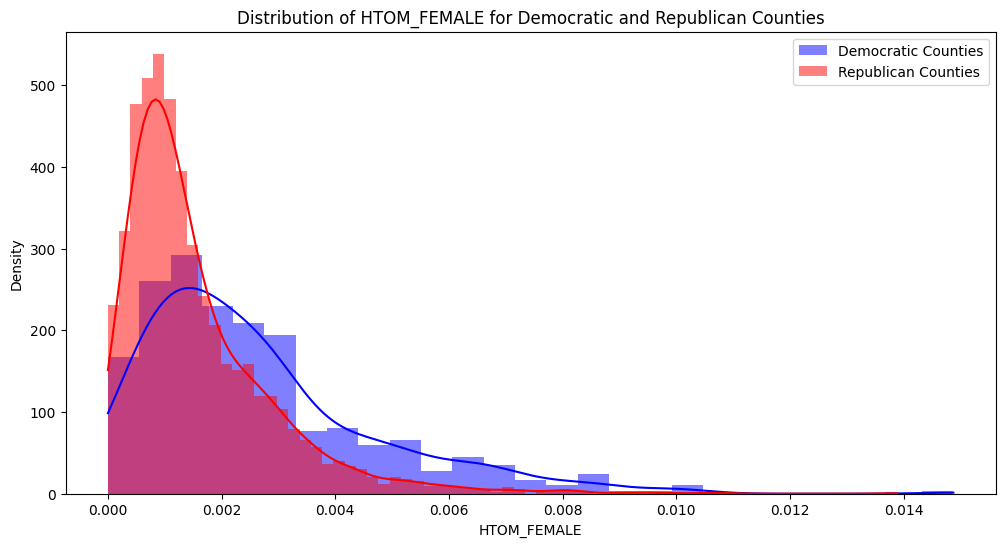

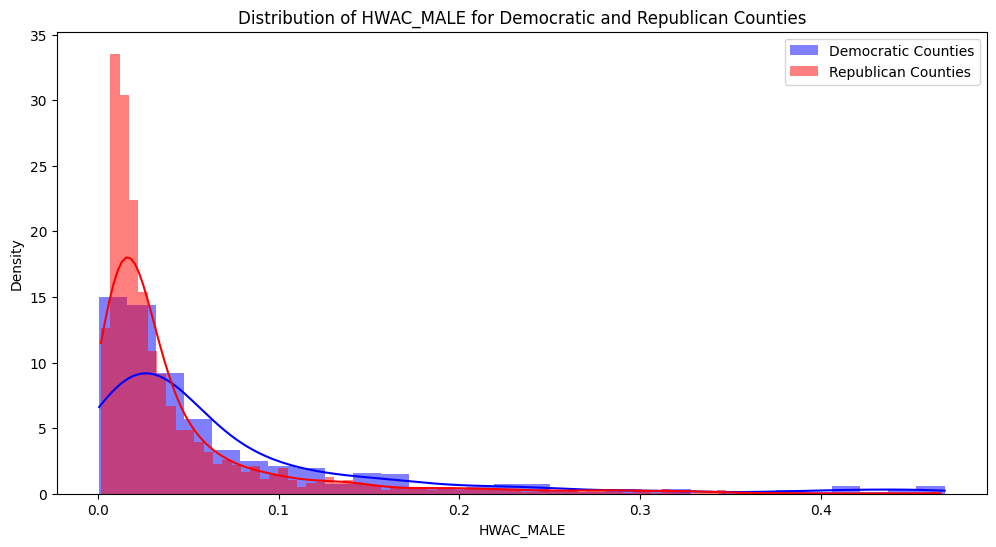

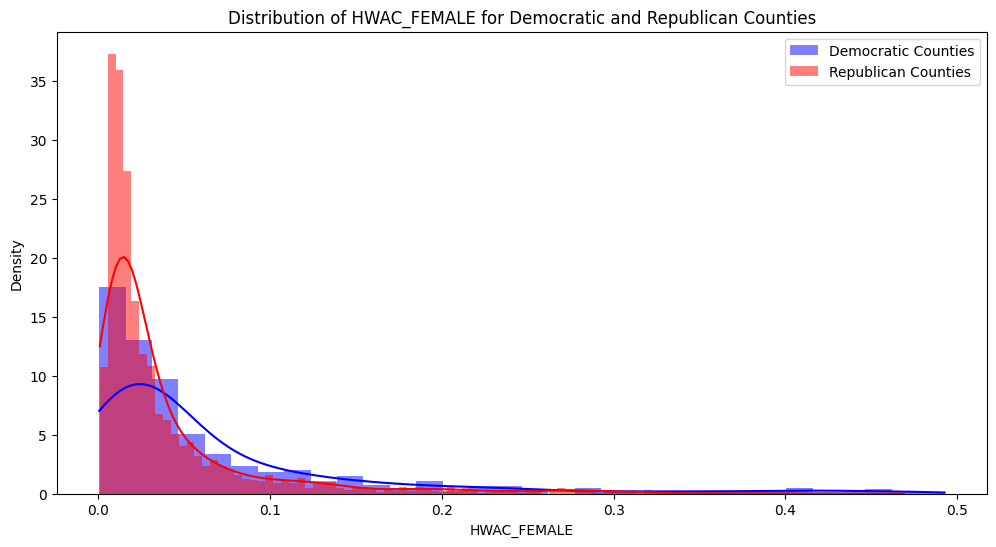

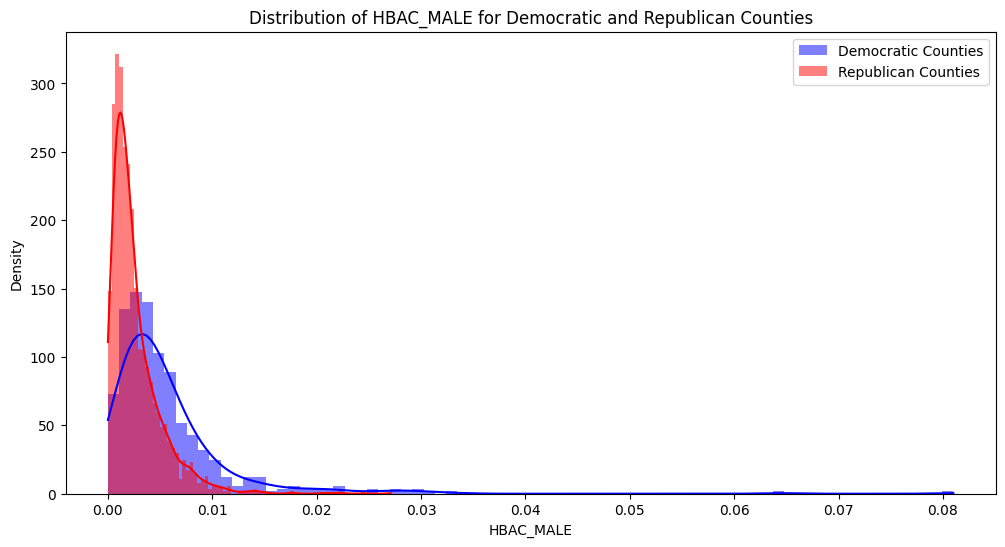

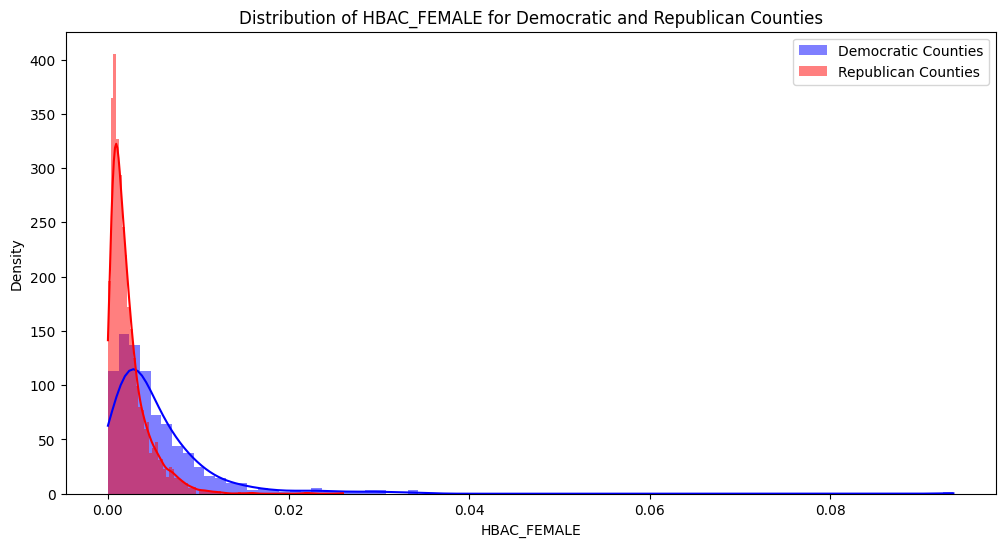

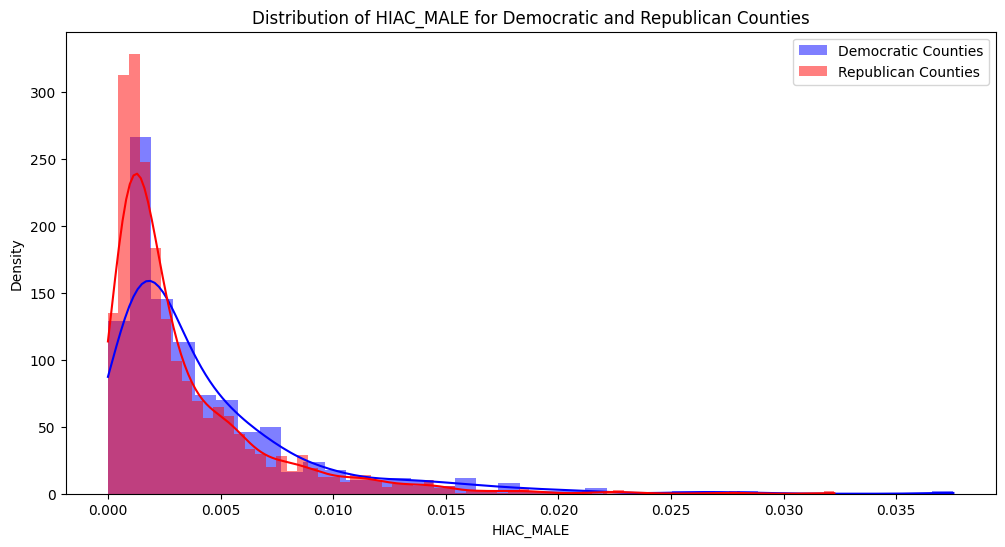

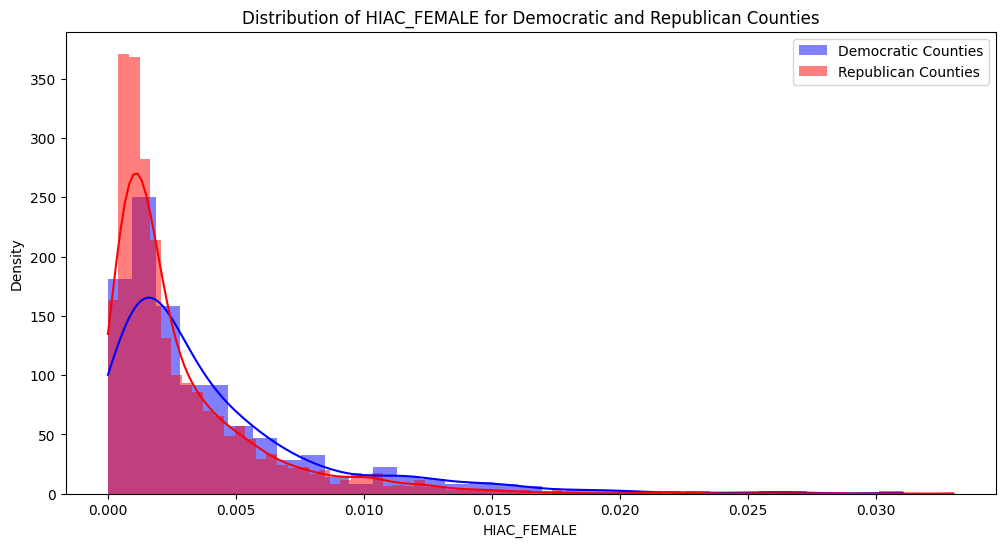

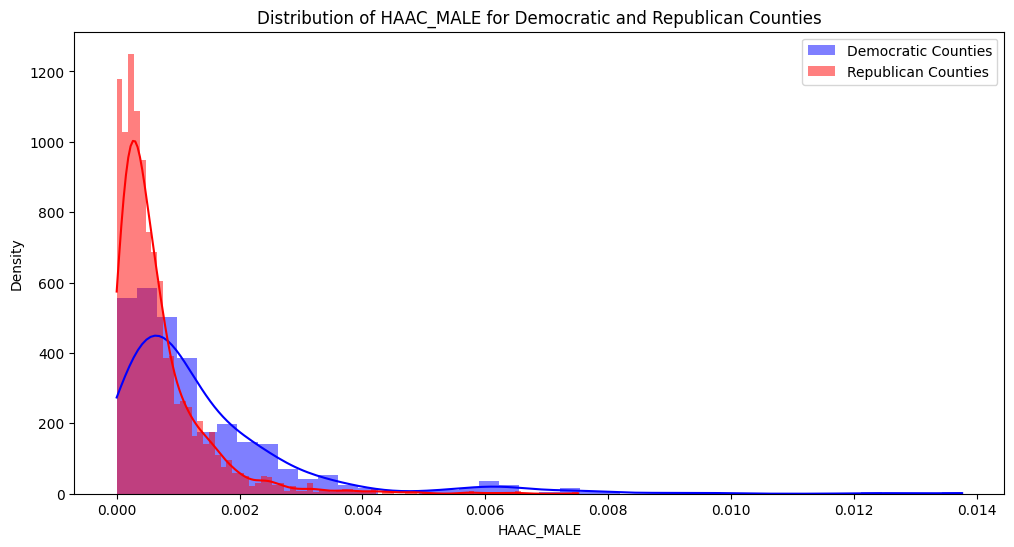

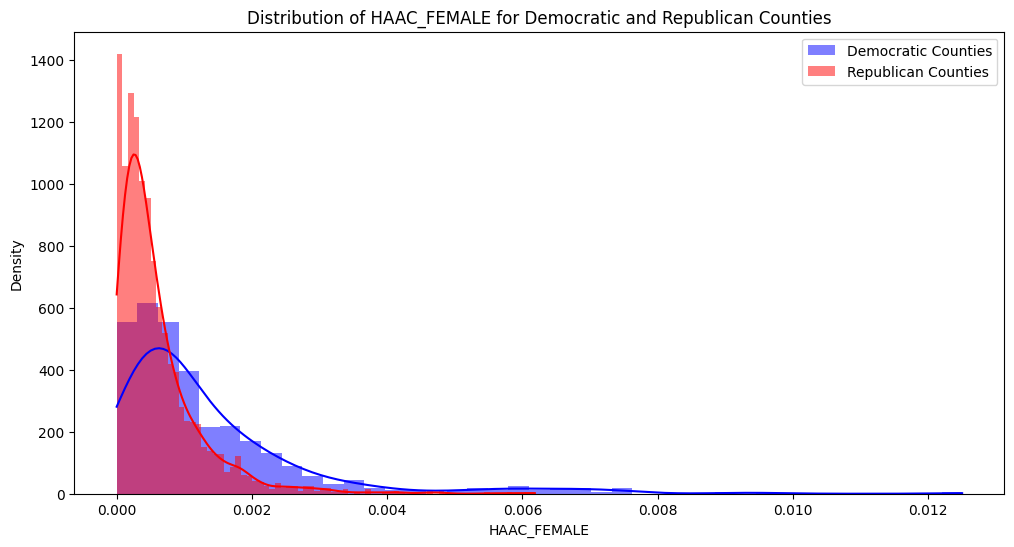

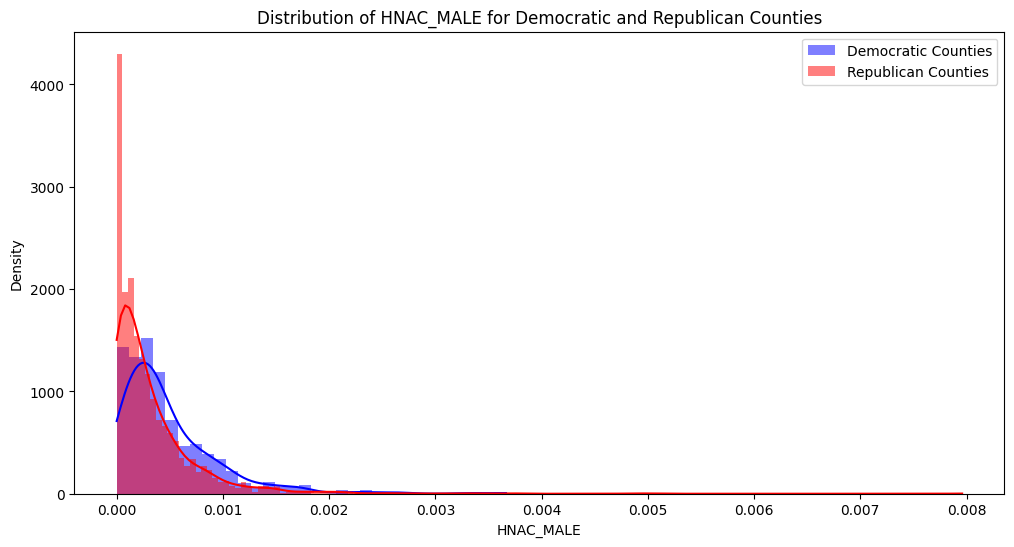

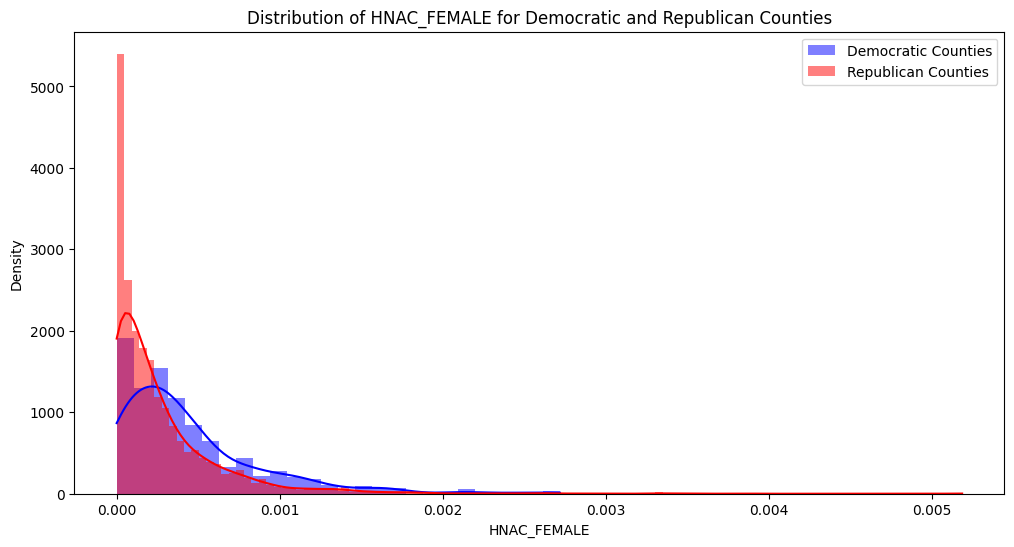

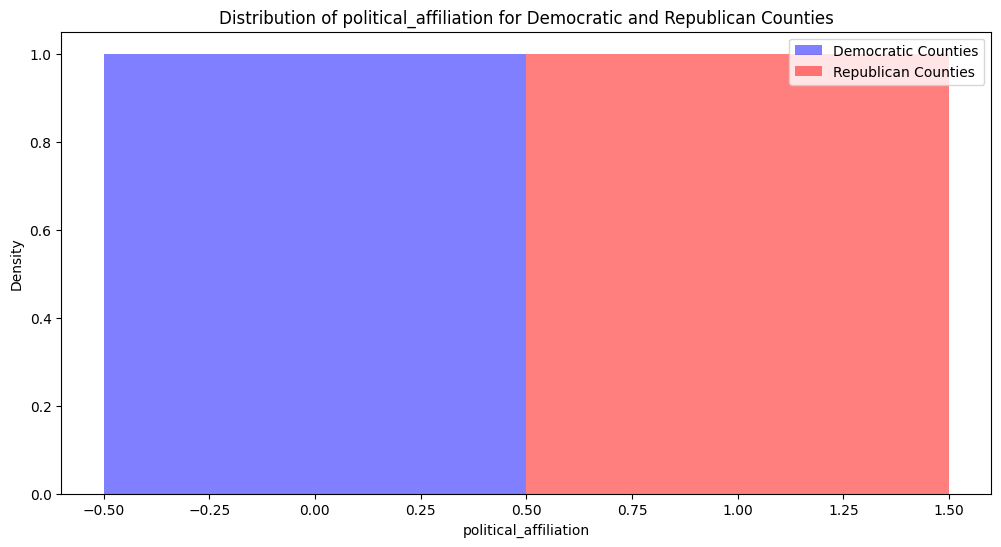

In [73]:
# Iterate over all columns in merged_df and plot their distributions
for column in merged_df.columns:
    plot_col_distr(column)